## Characterisation of whole genome sequence data from South African Neisseria gonorrhoeae isolates
This notebook will be a documentation of data explored and figures generated for my 4th year master's project. I am analysing whole-genome sequence data of Neisseria Gonorrhoea from South Africa. These are my main objectives:

1) Characterisation of genomes
2) Identification of anti-microbial resistance determinants
3) Comparison of genomes

While I will analyse my South African dataset alone, I will also analyse it in conjunction with (i) other available South African isolate data, (ii) data for isolates across the continent of Africa and (iii) data for isolates across the globe. These additional data will be acquired through the online database PubMLST.

### Introduction

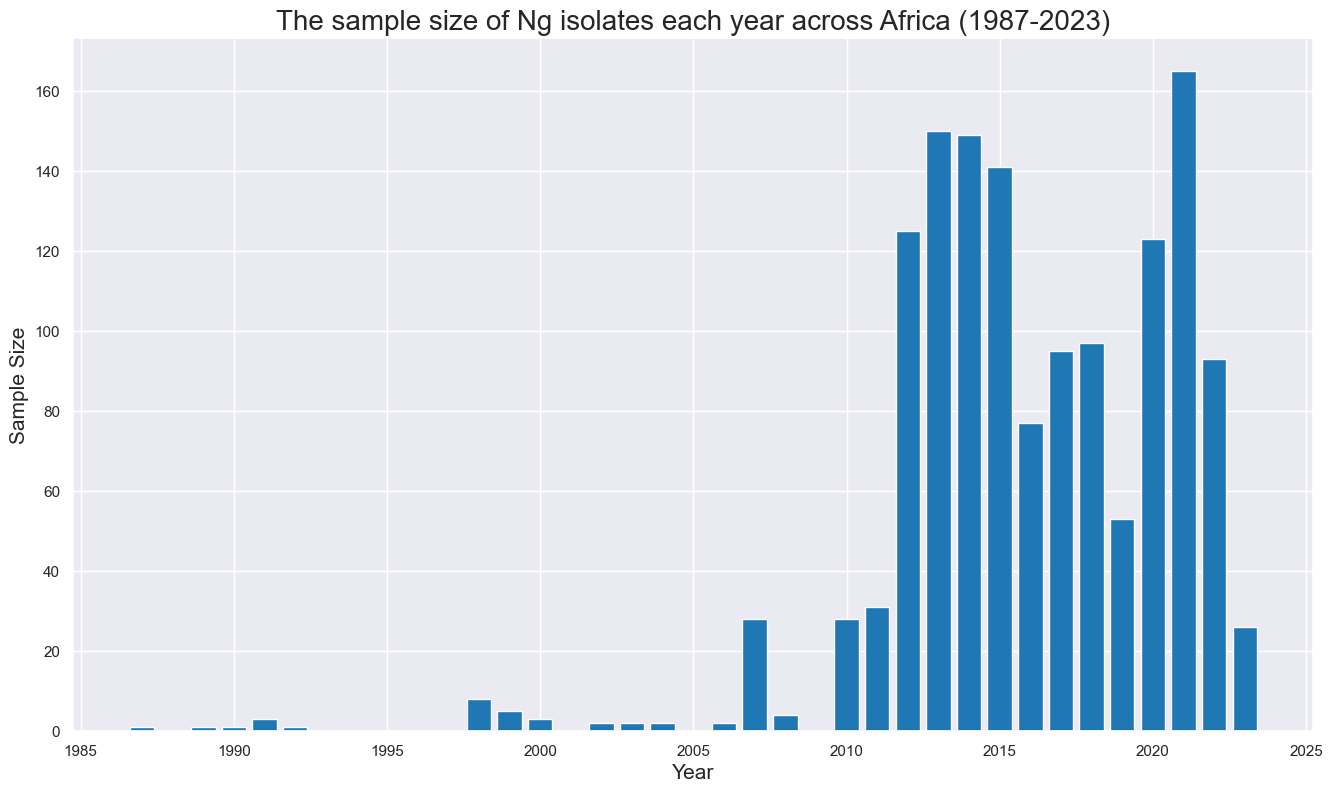

In [1]:
import importlib
import Functions
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

importlib.reload(Functions)


    # importing data from across Africa
afr: pd.DataFrame = pd.read_csv("Data/afr_priv.csv", sep = ",", header = "infer")

    # keeping only ID, country and year
afr.drop(columns = ["private_record", "private_owner"], inplace = True)

    # counting no. samples each year
year_count = afr.groupby("year").year.count()

    # converting series to DataFrame
year_df = pd.DataFrame({"year": year_count.index, "sample_size": year_count.values})


    # bar graph
sns.set_theme(style = "darkgrid")

Functions.bar(x = year_df.year, y = year_df.sample_size, xlab = "Year", ylab = "Sample Size", title = "The sample size of Ng isolates each year across Africa (1987-2023)")

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)

plt.show()


This figure shows the number of Neisseria Gonorrhoeae isolates (available on PubMLST) collected across Africa through time. 2012 is the first year that data that forms my South African data was collected. This highlights a major problem regarding surveillance of Neisseria Gonorrhoeae in Africa and the need for projects that collects and analyses large quantities of isolates.

In [2]:
    # counting no. isolates in each combination of country & year
country_year = afr.groupby(["country", "year"]).count().reset_index()
    
    # renaming column header 
country_year.rename(columns = {"id": "sample_size"}, inplace = True)

    
    # creating a pivot table
pivot_df = country_year.pivot_table(index = "year", columns = "country", values = "sample_size")
   

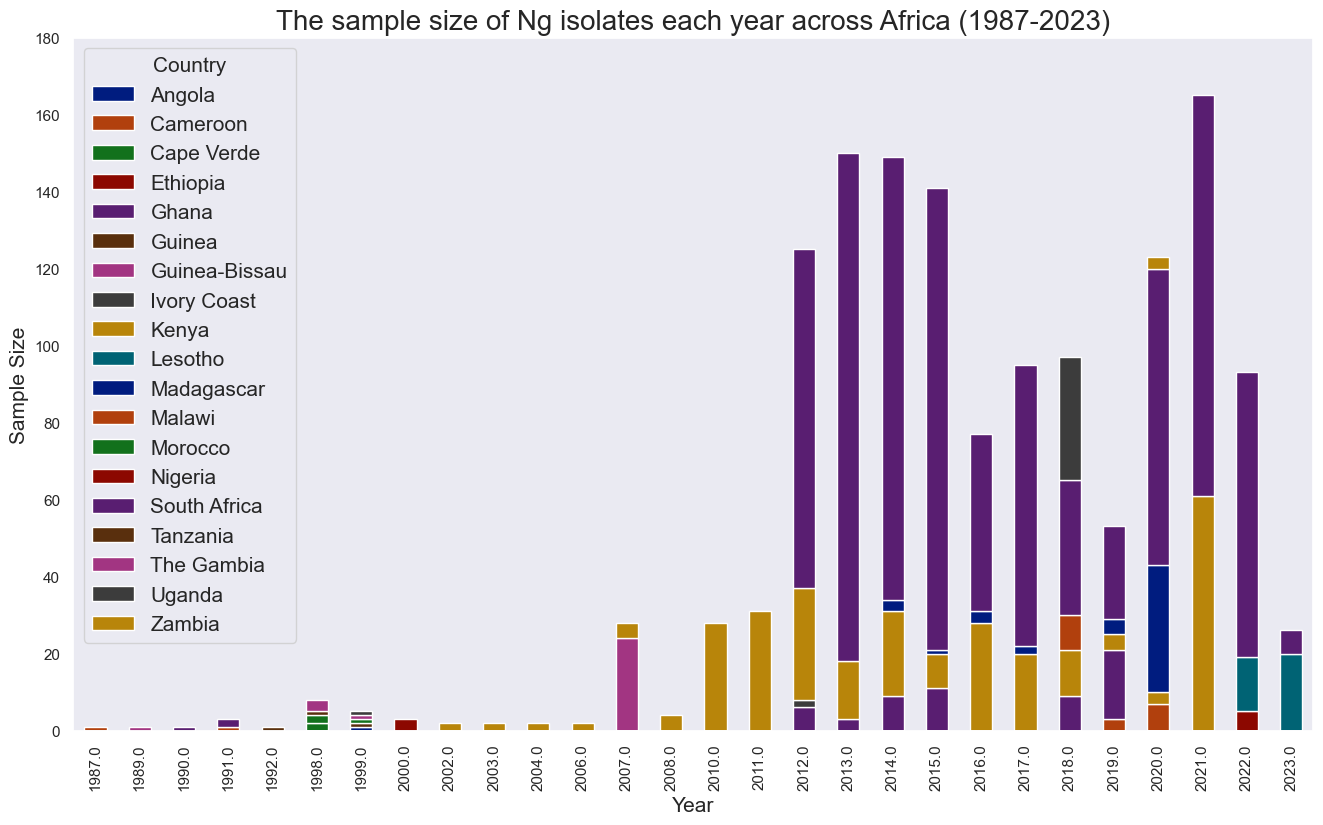

In [3]:
 # creating a stacked bar graph
sns.set_theme(style = "dark", palette = "dark")

pivot_df.plot(kind = "bar", stacked = True, figsize = (16,9), xlabel = "Year", ylabel = "Sample Size", ylim = (0,180))

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)
plt.title("The sample size of Ng isolates each year across Africa (1987-2023)", fontsize = 20)
#plt.axhline(y = 100)
plt.legend(title = "Country", fontsize = 15, title_fontsize = "15")

plt.show()


Not only is there a lack of good surveillance in Africa but there is large disproportion in terms of the countries that are represented. South Africa makes up a large proportion of the sample, with other countries (mainly Kenya) filling up the rest. However, most of the South African isolates are from my South African data.

In [4]:
    # importing all South African isolates
afr_priv = pd.read_csv("Data/afr_priv.csv", sep = ",", header = "infer")

    # removing all privately owneed isolates by filtering
afr_priv = afr_priv[afr_priv.private_record == False]

    # removing columns
afr_priv.drop(columns = ["private_record", "private_owner"], inplace = True)

    # grouping by country & year
country_year2 = afr_priv.groupby(["country", "year"]).count().reset_index()

    # renaming column "id"
country_year2.rename(columns = {"id": "sample_size"}, inplace = True)

    # creating pivot table
pivot_df2 = country_year2.pivot_table(index = "year", columns = "country", values = "sample_size")


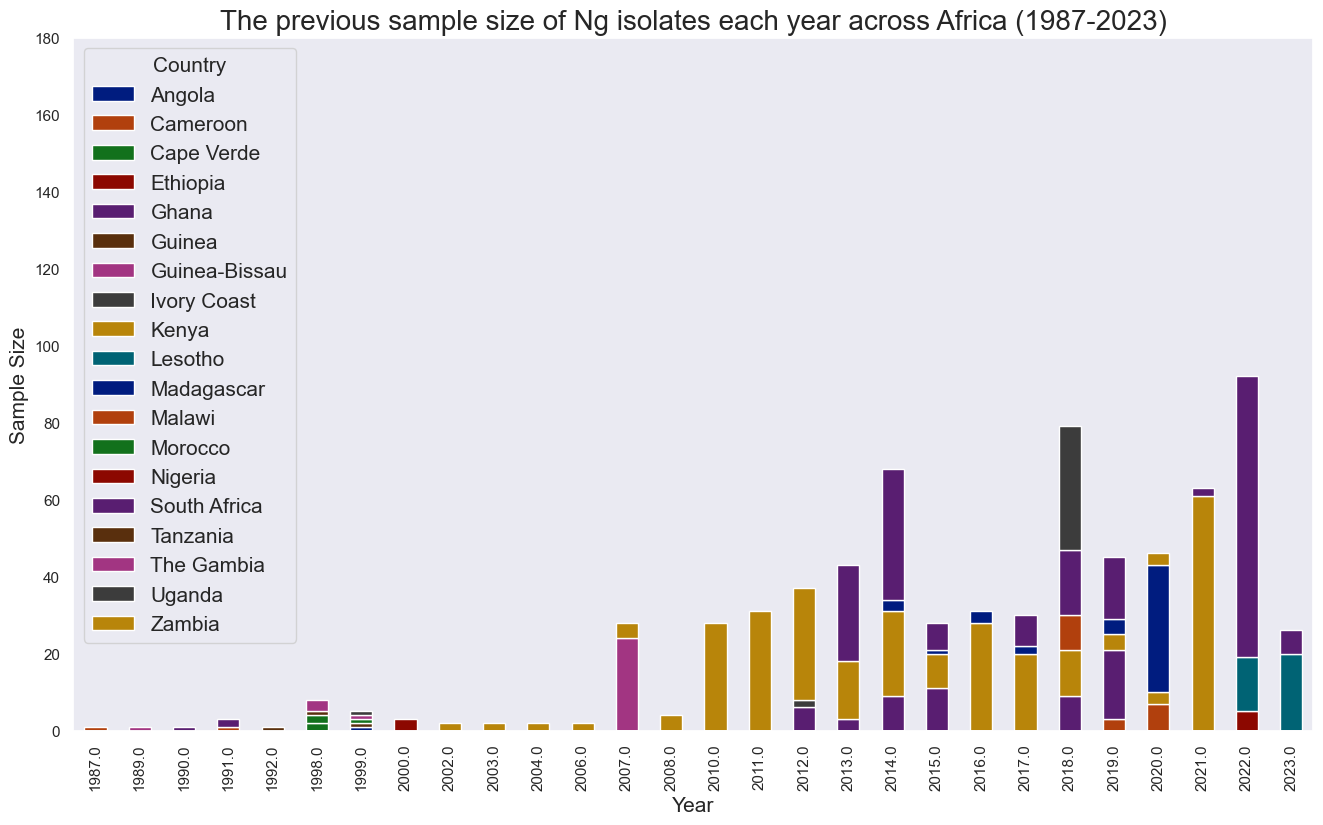

In [5]:
    # creating stacked bar graph
sns.set_theme(style = "dark", palette = "dark")

pivot_df2.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (0, 180))

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)
plt.title("The previous sample size of Ng isolates each year across Africa (1987-2023)", fontsize = 20)
#plt.axhline(y = 100)
plt.legend(title = "Country", fontsize = 15, title_fontsize = 15)

plt.show()

This figure shows the isolate collection across Africa, excluding the isolates collected for this project's analysis. It's visible between the two graphs how much of an increase to the overall isolate collection the new South African samples gives.

In [6]:
#fig, ax = plt.subplots(2,1, figsize = (16,9), sharex = True)

#pivot_df.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (0, 170), ax = ax[0])

#pivot_df2.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (0, 170), ax = ax[1])

#ax[0].legend(title = "Country", ncol = 2, fontsize = 12, title_fontsize = 12)
#ax[1].legend().set_visible(False)

#plt.show()


In [7]:
    # replacing all NAs with 0
pivot_df.fillna(value = 0, inplace = True)    

    # calculating the cumulative sum along the years
cum_afr = pivot_df.cumsum(axis = 0)

print(cum_afr.loc[2023.0].sum())

1416.0


Note to self: Only 1416 isolates instead of 1886 because 470 isolates don't have country data.

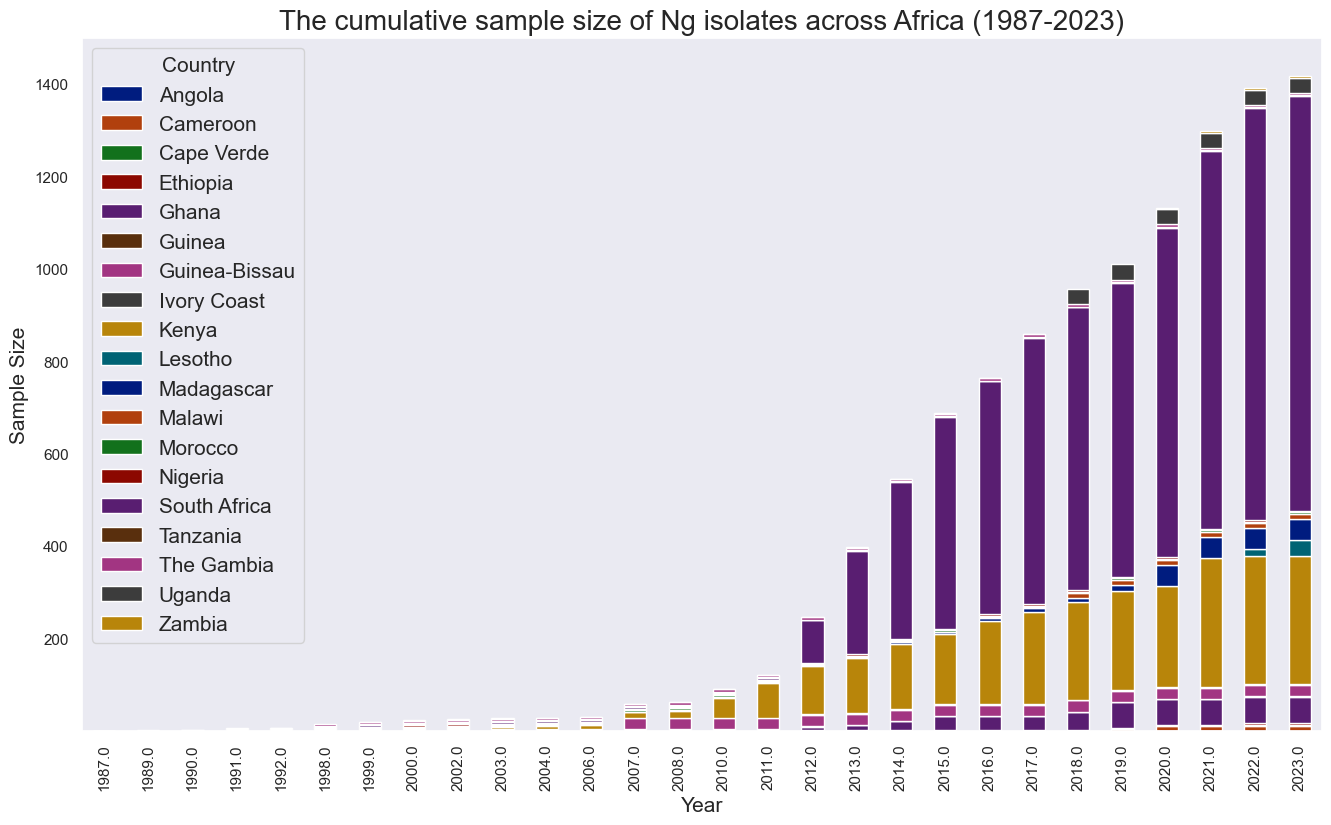

In [8]:
    # creating a stacked bar graph
sns.set_theme(style = "dark", palette = "dark")

cum_afr.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (1,1500))

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)
plt.title("The cumulative sample size of Ng isolates across Africa (1987-2023)", fontsize = 20)
plt.legend(title = "Country", fontsize = 15, title_fontsize = "15")

plt.show()


710.0


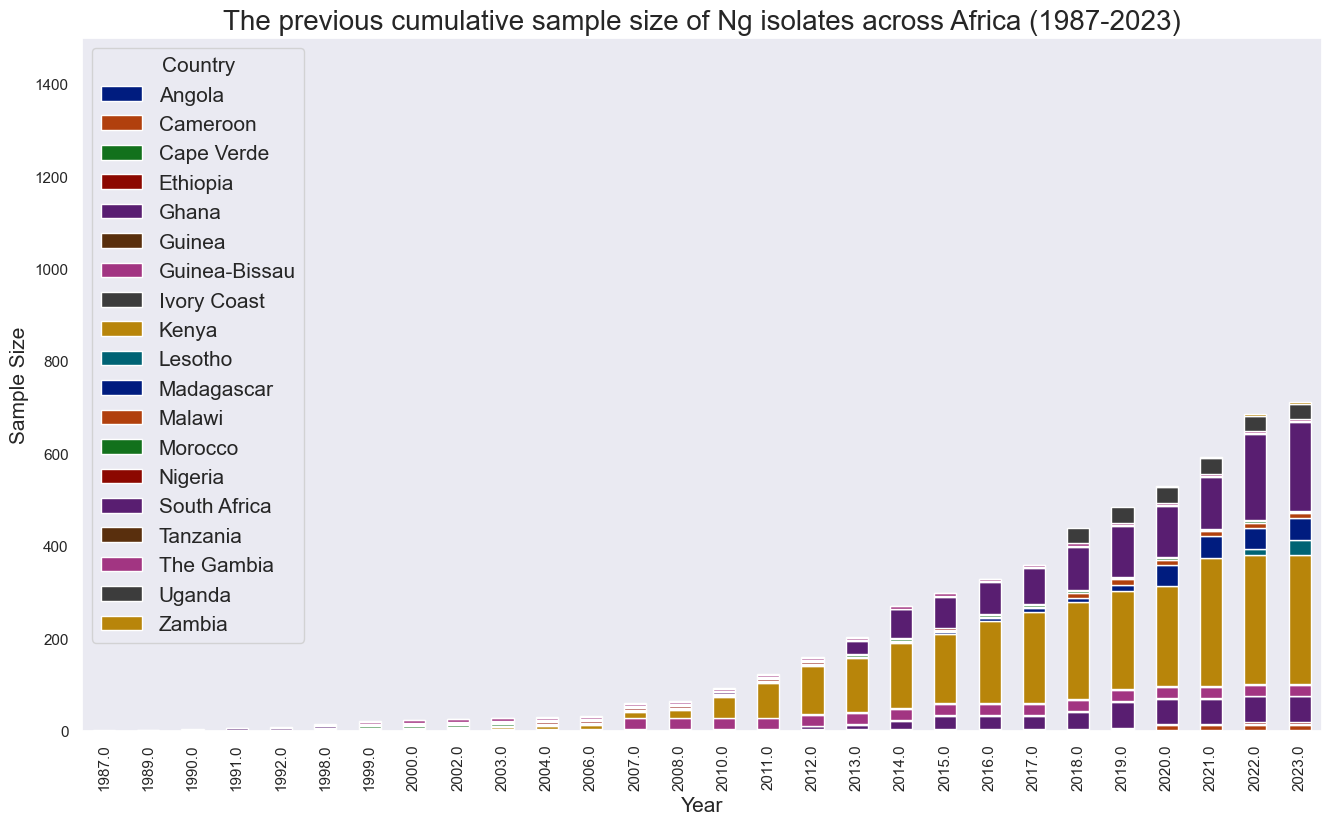

In [9]:
    # replacing all NAs with 0
pivot_df2.fillna(value = 0, inplace = True)    

    # calculating the cumulative sum along the years
cum_afr2 = pivot_df2.cumsum(axis = 0)

print(cum_afr2.loc[2023.0].sum())

    # creating a stacked bar graph
sns.set_theme(style = "dark", palette = "dark")

cum_afr2.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (0,1500))

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)
plt.title("The previous cumulative sample size of Ng isolates across Africa (1987-2023)", fontsize = 20)
plt.legend(title = "Country", fontsize = 15, title_fontsize = "15")

plt.show()


The two figures above reiterate the significant relative increase in isolate collection that this project works with. 

There are 1 isolate(s) without a year.
There are 933 isolates from South Africa.
706 of these are from this project.


/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_53426/2871212672.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubmlst_sa_clean["year"] = pubmlst_sa_clean["year"].astype(int)


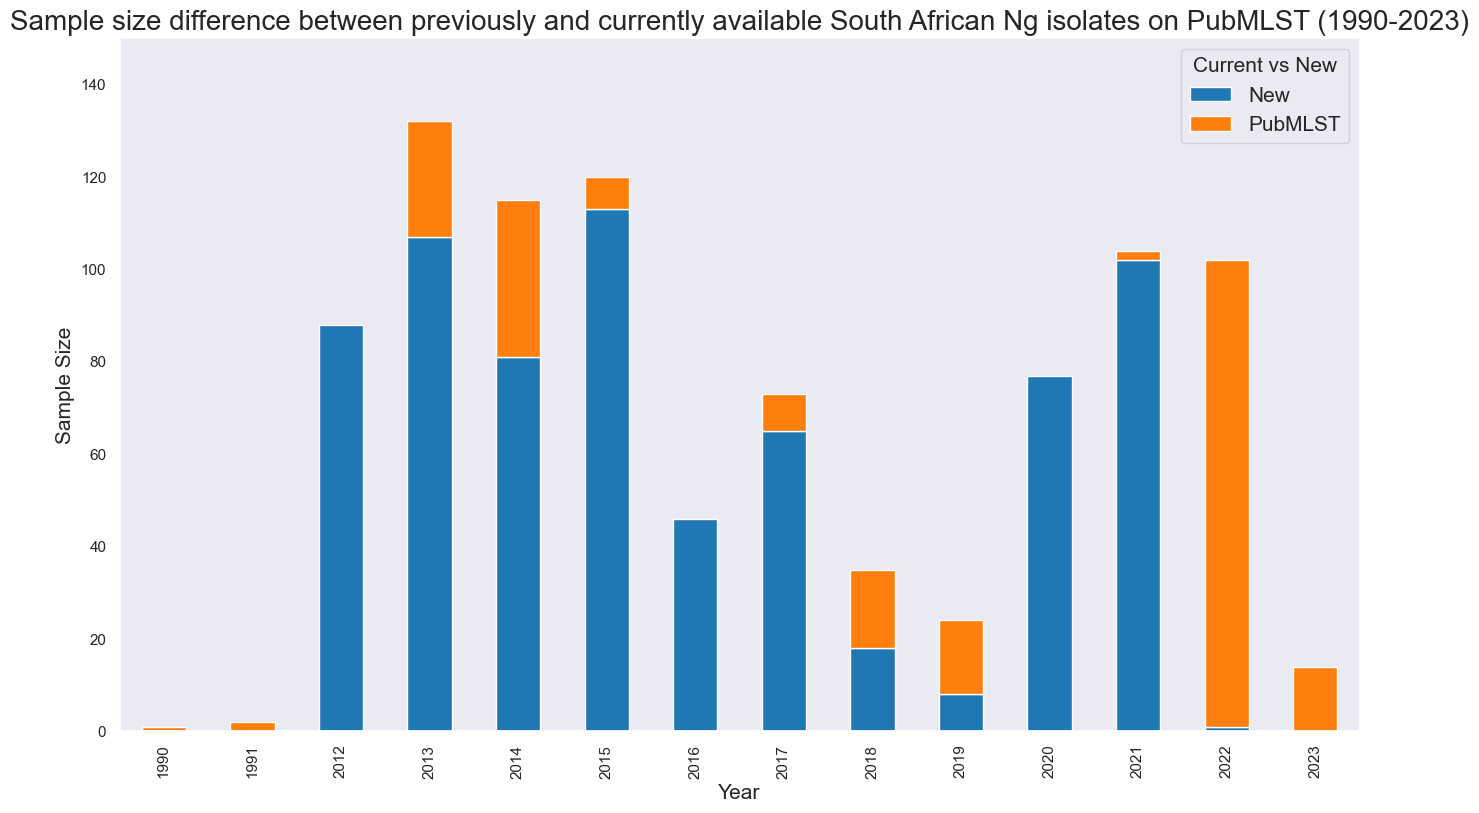

In [10]:
pubmlst_sa: pd.DataFrame = pd.read_csv("Data/sa_priv.csv", sep = ",", header = "infer")


print(f"There are {len(pubmlst_sa[pubmlst_sa["year"].isna()])} isolate(s) without a year.")

pubmlst_sa_clean: pd.DataFrame = pubmlst_sa.dropna(subset = "year")

pubmlst_sa_clean["year"] = pubmlst_sa_clean["year"].astype(int)

pubmlst_sa_clean2: pd.DataFrame = pubmlst_sa_clean.replace(to_replace = {True: "New", False: "PubMLST"})


pubmlst_sa_group: pd.DataFrame = pubmlst_sa_clean2.groupby(["year", "private_record"]).size().reset_index(name = "count")

print(f"There are {pubmlst_sa_group["count"].sum()} isolates from South Africa.")
print(f"{pubmlst_sa_group["count"][pubmlst_sa_group["private_record"] == "New"].sum()} of these are from this project.")

    
    # creating pivot table
pivot_sa = pubmlst_sa_group.pivot_table(index = "year", columns = "private_record", values = "count")
pivot_sa


    # creating a stacked bar graph
sns.set_theme(style = "dark", palette = "tab10")

pivot_sa.plot(kind = "bar", stacked = True, figsize = (16,9), ylim = (0,150))

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Sample Size", fontsize = 15)
#plt.xticks(rotation = 45, size = 20)
#plt.yticks(size = 20)
plt.title("Sample size difference between previously and currently available South African Ng isolates on PubMLST (1990-2023)", fontsize = 20)
plt.legend(title = "Current vs New", fontsize = 15, title_fontsize = "15")

plt.show()


I have imported data from PubMLST for all available South African Ng isolates, noting whether they are private (new isolates from this project) or not (already there). The above figure shows how much this project improves the publicly available Ng isolate database.

### Phenotypic AMR data

#### My South African collection

##### SIR data


In [11]:
    # importing phenotypic AMR data for my South African isolates
my_amr_sir: pd.DataFrame = pd.read_csv("Data/my_amr_sir.csv", sep = ",", header = "infer")


    # renaming columns...
my_amr_sir.rename(columns = {'cefixime_SIR': "cef_sir", 'ceftriaxone_SIR': "ceftri_sir", "ciprofloxacin_SIR": "cipro_sir", "penicillin_SIR": "pen_sir", "tetracycline_SIR": "tet_sir"}, inplace = True)


    # separating out the data for each antimicrobial, while removing rows with missing data
    
    # cefixime
my_cef: pd.Series = my_amr_sir["cef_sir"].dropna(axis = 0, how = "any")
    # ceftriaxone
my_ceftri: pd.Series = my_amr_sir["ceftri_sir"].dropna(axis = 0, how = "any")
    # ciprofloxacin
my_cipro: pd.Series = my_amr_sir["cipro_sir"].dropna(axis = 0, how = "any")
    # penicillin
my_pen: pd.Series = my_amr_sir["pen_sir"].dropna(axis = 0, how = "any")
    # tetracycline
my_tet: pd.Series = my_amr_sir["tet_sir"].dropna(axis = 0, how = "any")


    # counting the frequency of S/I/R for each antimicrobial
    
    # cefixime
amr_cef: pd.Series = my_cef.groupby(my_cef).count()
    # ceftriaxone
amr_ceftri: pd.Series = my_ceftri.groupby(my_ceftri).count()
    # ciprofloxacin
amr_cipro: pd.Series = my_cipro.groupby(my_cipro).count()
    # penicillin
amr_pen: pd.Series = my_pen.groupby(my_pen).count()
    # tetracycline
amr_tet: pd.Series = my_tet.groupby(my_tet).count()


Here I have imported a dataset containing phenotypic AMR data for my South African isolates. I conducted some operations on this dataset:

1) Created individual series for each antimicrobial.
2) Created a series for each antimicrobial that summarises the number of records of S, I and R in their respective DataFrame.

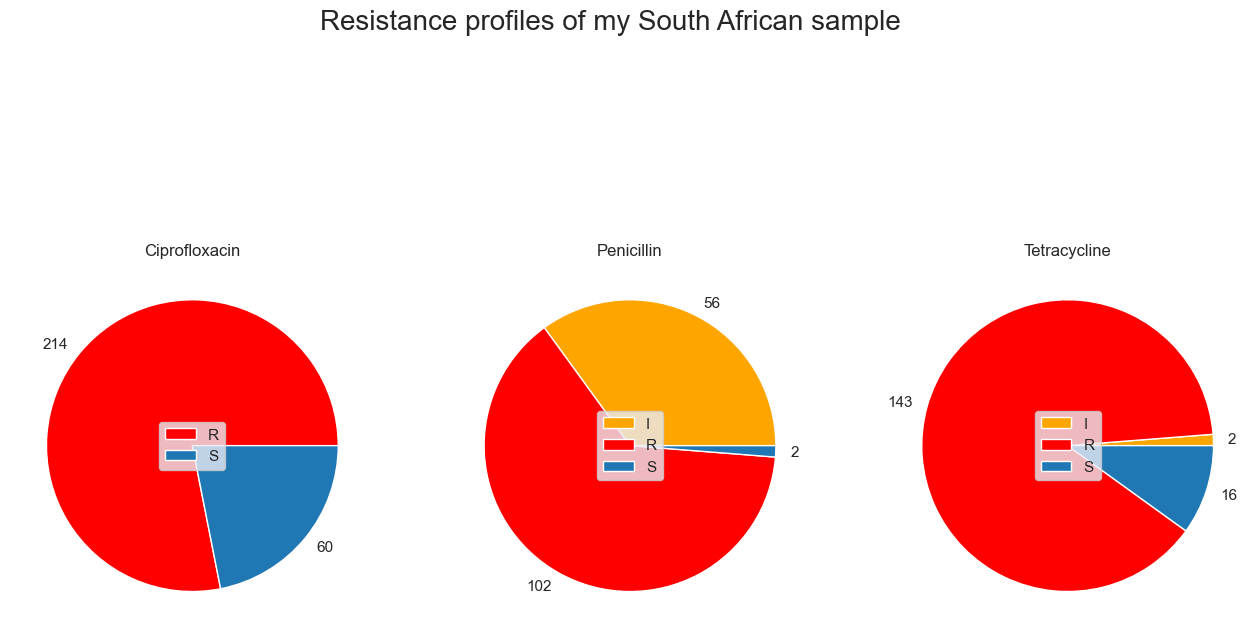

In [12]:
    # Creating a figure with 4 subplots
fig, ax = plt.subplots(1,3, figsize = (16,9))

    # making a pie chart showing the results of phenotypic AMR tests to ciprofloxacin
Functions.pie(data = amr_cipro, title = "Ciprofloxacin", ax = ax[0], colors = ["red", "#1f77b4"])

    # ...same for penicillin
Functions.pie(data = amr_pen, title = "Penicillin", ax = ax[1], colors = ["orange","red", "#1f77b4"])

    # ...same for tetracyclin
Functions.pie(data = amr_tet, title = "Tetracycline", ax = ax[2], colors = ["orange","red", "#1f77b4"])

    # adding a title to the figure
fig.suptitle("Resistance profiles of my South African sample", fontsize = 20)

plt.show()

This figure contains pie charts that show the frequency of S, I and R in my South African collection for ciprofloxacin, penicillin and tetracycline. These antimicrobials are previously-recommended treatments for gonorrhoea, but have since been made redundant due to high level AMR.

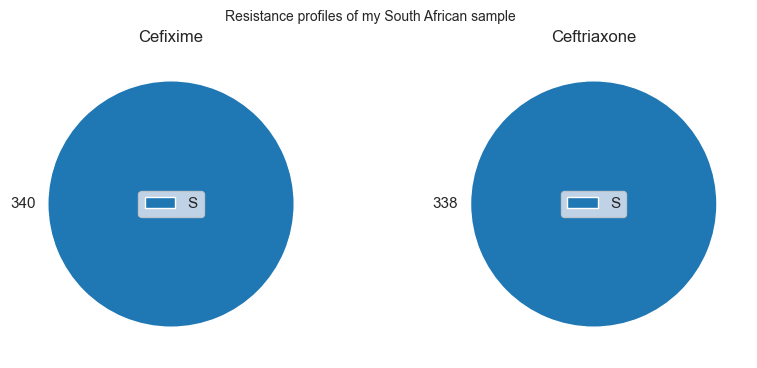

In [13]:
    # Creating a figure with 4 subplots
fig, ax = plt.subplots(1,2, figsize = (10,4))

    # making a pie chart showing the results of phenotypic AMR tests to cefixime
Functions.pie(data = amr_cef, title = "Cefixime", ax = ax[0])

    # ...same for ceftriaxone
Functions.pie(data = amr_ceftri, title = "Ceftriaxone", ax = ax[1])

    # adding a title to the figure
fig.suptitle("Resistance profiles of my South African sample", fontsize = 10)

plt.show()

Here I have created two figures. Each pie chart corresponds to a different antimicrobial (ceftriaxone & cefixime) and shows the frequency of isolates in my South African isolates dataset at each level of antimicrobial resistance (S, I, R)

##### MIC data

In the previous figures, there is no pie chart for Azithromycin. This is because Azithromycin doesn't have a EUCAST breakpoint. Furthermore, Azithromycin MIC signs that are available on PubMLST are based on whatever threshold is used for determining them. Therefore, I will look at the MIC values to explore resistance.

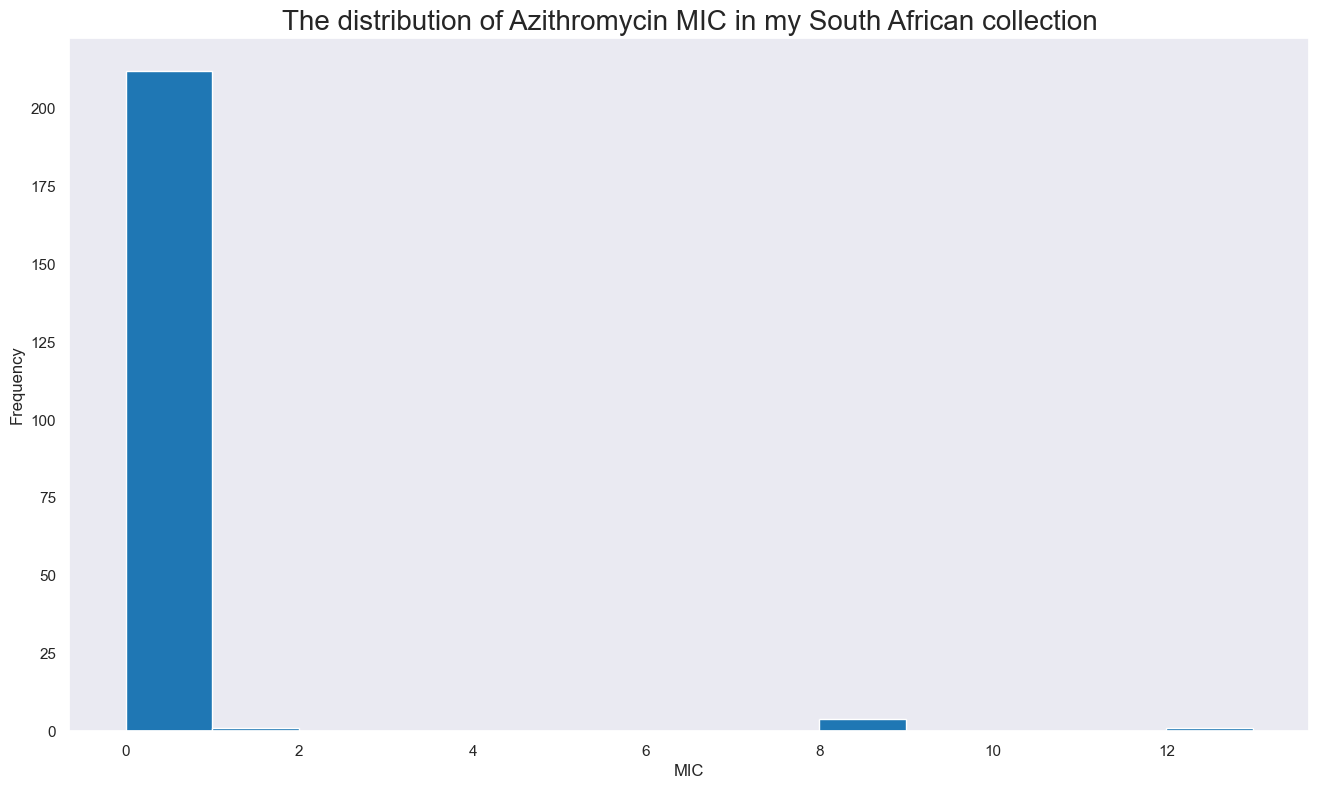

In [14]:
    # importing MIC data
my_amr_mic: pd.DataFrame = pd.read_csv("Data/my_amr_mic.csv", sep = ",", header = "infer")

    # cleaning function
Functions.clean(df = my_amr_mic, rename_cols = {"azithromycin_mic": "azi_mic", "cefixime_mic": "cef_mic", "ceftriaxone_mic": "ceftri_mic"}, replace_val = {"Gauteng": "Gauteng Province", "KwaZulu Natal": "Kwazulu-Natal", "KwaZulu-Natal": "Kwazulu-Natal"})

    
    # filtering for azithromycin data
my_azi: pd.DataFrame = pd.DataFrame(my_amr_mic["azi_mic"])
    # removing rows with missing data
my_azi_clean: pd.DataFrame = my_azi.dropna(axis = 0, how = "any")


    # plotting the distribution of azithromycin MIC
fig = plt.figure(figsize = (16,9))

plt.hist(data = my_azi_clean, x = "azi_mic", bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13])

plt.title("The distribution of Azithromycin MIC in my South African collection", fontsize = 20)
plt.xlabel("MIC")
plt.ylabel("Frequency")

plt.show()


Here, I imported Azithromycin MIC (not sign) data for my South African isolates and plotted their MICs in a histogram. To determine "resistant" strains, I will use the EUCAST epidemiological cut-off value (ECOFF) 1 mg/L (> 1). The majority of isolates with MIC data have an MIC <= 1, but some have an MIC beyond that which may indicate resistance.

In [15]:
    # parsing out the strains with an MIC > ECOFF
my_azi_res: pd.DataFrame = my_azi_clean.loc[my_azi_clean["azi_mic"] > 1]

print(f"There are {len(my_azi_res)} isolates that are resistant to Azithromycin")
#my_azi_res


There are 5 isolates that are resistant to Azithromycin


I have created a new DataFrame containing the isolates with an MIC > 1 mg/L. I will investigate this in "Genotypic & Phenotypic AMR links".

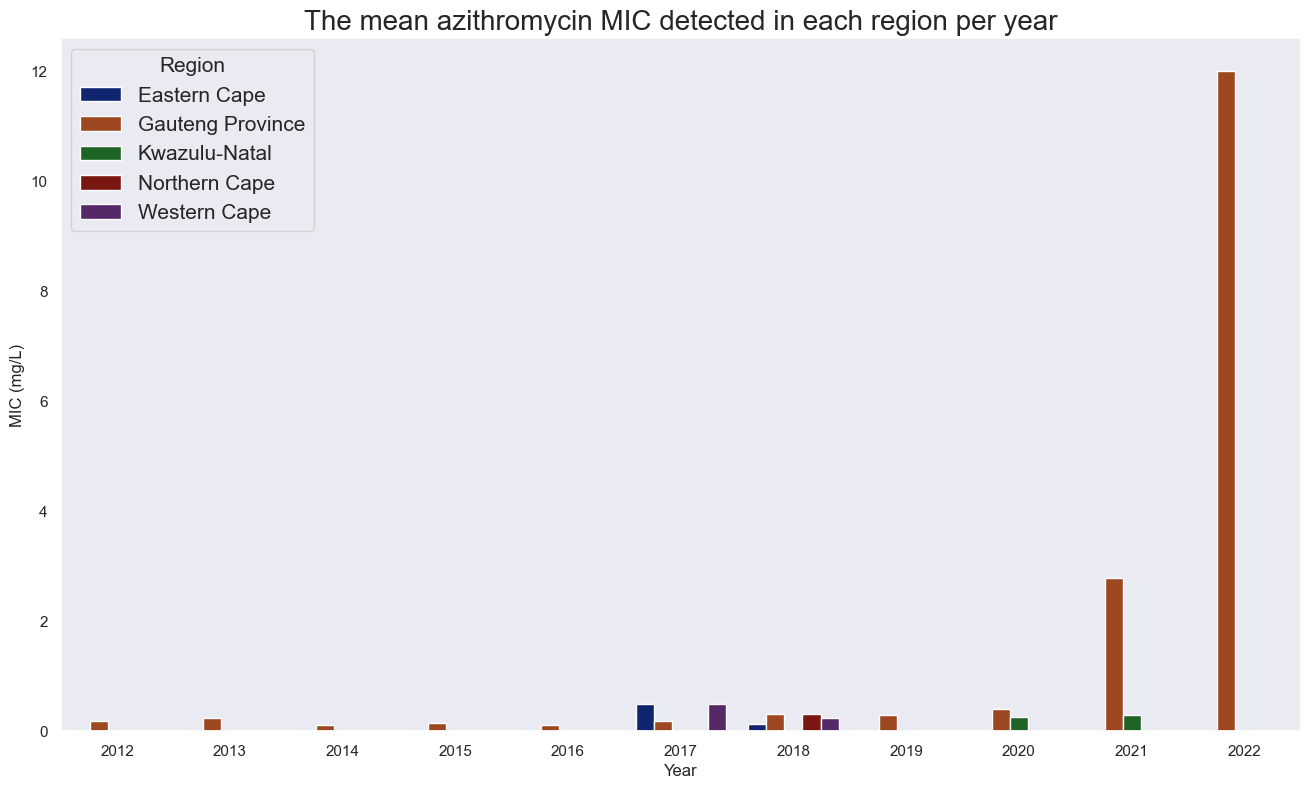

In [16]:
    # filtering for azithromycin MIC data 
my_azi_mic: pd.DataFrame = my_amr_mic.drop(columns = ["cef_mic", "ceftri_mic"])

    # removing rows without MIC data
my_azi_mic_clean: pd.DataFrame = my_azi_mic.dropna(subset = "azi_mic")

    # creating a pivot table
my_azi_pivot: pd.DataFrame = my_azi_mic_clean.pivot_table(index = "year", columns = "region", values = "azi_mic", aggfunc = "mean")


    # melting the pivot table
my_azi_melt: pd.DataFrame = my_azi_pivot.reset_index().melt(id_vars = "year", var_name = "region", value_name = "azi_mic")


    # plotting bar graph with Seaborn
fig = plt.figure(figsize = (16,9))

sns.barplot(data = my_azi_melt, x = "year", y = "azi_mic", hue = "region", palette = "dark")

#plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("MIC (mg/L)")
plt.title("The mean azithromycin MIC detected in each region per year", fontsize = 20)
plt.legend(title = "Region", title_fontsize = 15, fontsize = 15)

plt.show()



I created a DataFrame that contains data on Azithromycin MIC for each year & region sampled in my South African collection. The above bar graph shows this data, with the mean MIC each year for each region. 2021 and 2022 show a significant increase in Azithromycin MIC: 2021 had 4 isolates with an MIC of 8 and 2022 had one isolate with an MIC of 12. This is a concerning discovery and will be investigated later on.

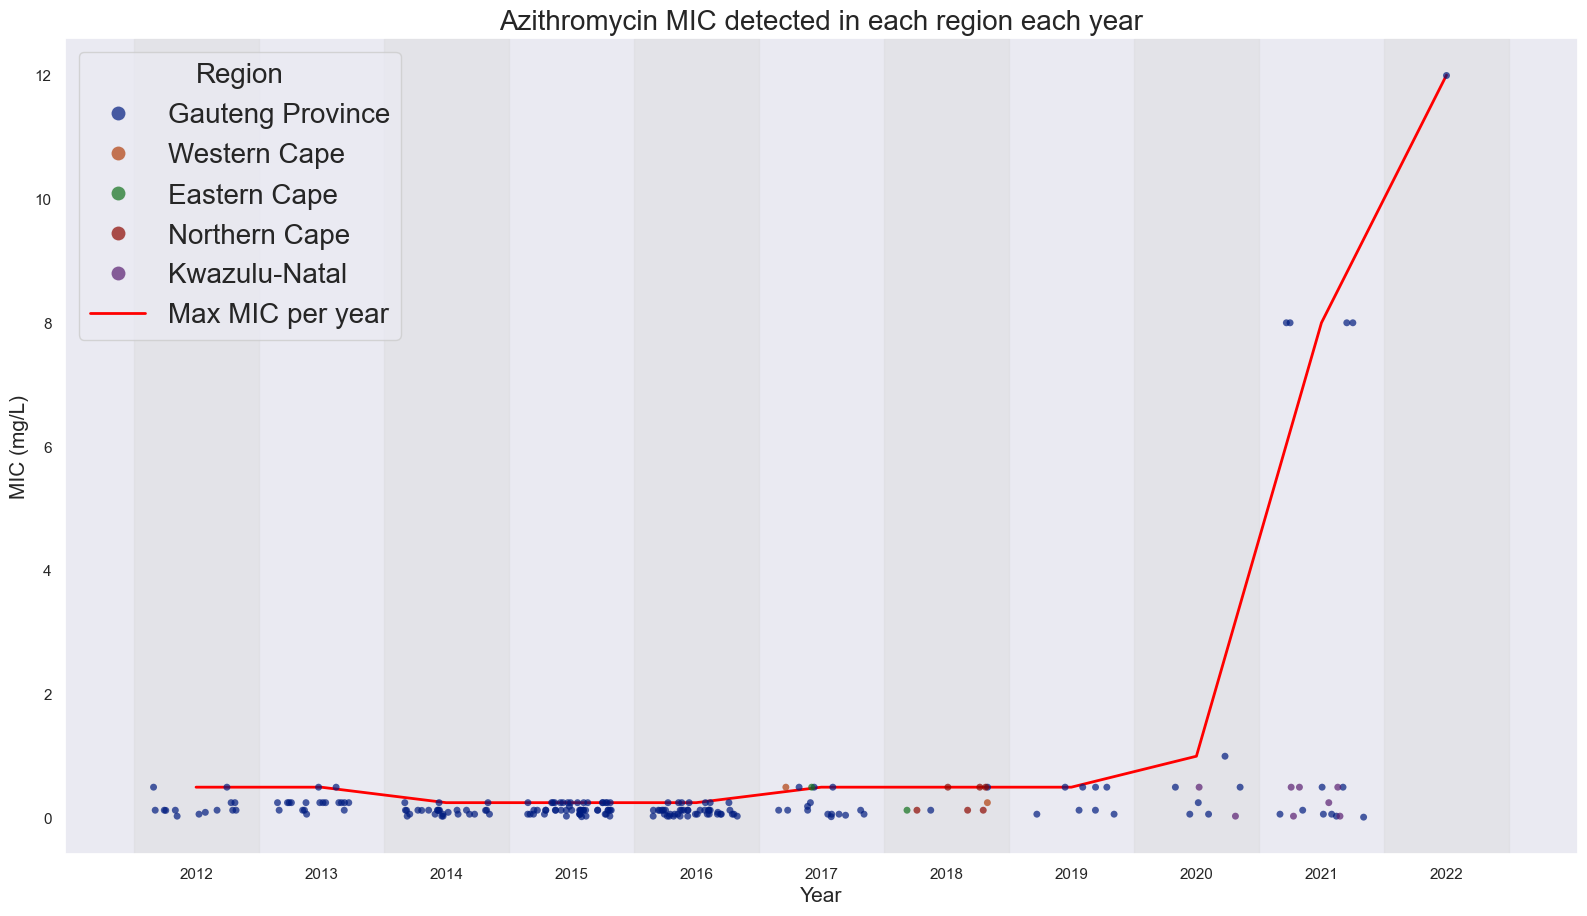

In [17]:
    # replacing NaNs in "region" columns
my_azi_mic_clean.loc[:, "region"] = my_azi_mic_clean["region"].fillna("NA")

    # extracting the maximum azithromycin MIC each year 
max_azi_mic: pd.Series = my_azi_mic_clean.groupby("year")["azi_mic"].max().reset_index()

    # converting "year" to a categorical variable and aligning them to the "year" in my_azi_mic_clean
max_azi_mic["year"] = pd.Categorical(values = max_azi_mic["year"], categories = my_azi_mic_clean["year"].unique(), ordered = True)


    # setting a random seed
np.random.seed(12)    

    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = my_azi_mic_clean, x = "year", y = "azi_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
plt.plot(max_azi_mic["year"].cat.codes, max_azi_mic["azi_mic"], color="red", linewidth=2, label="Max MIC per year")


    # extracting unique years
unique_years = my_azi_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(unique_years):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
plt.title("Azithromycin MIC detected in each region each year", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("MIC (mg/L)", fontsize = 15)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.show()


This figure also shows Azithromycin MIC data for my South African sample, however by using a strip plot, the distribution of the data is much clearer. The large spike in MIC is only caused by 4 strains in 2021 and 1 strain in 2022. This could suggest the early emergence of a big AMR problem.

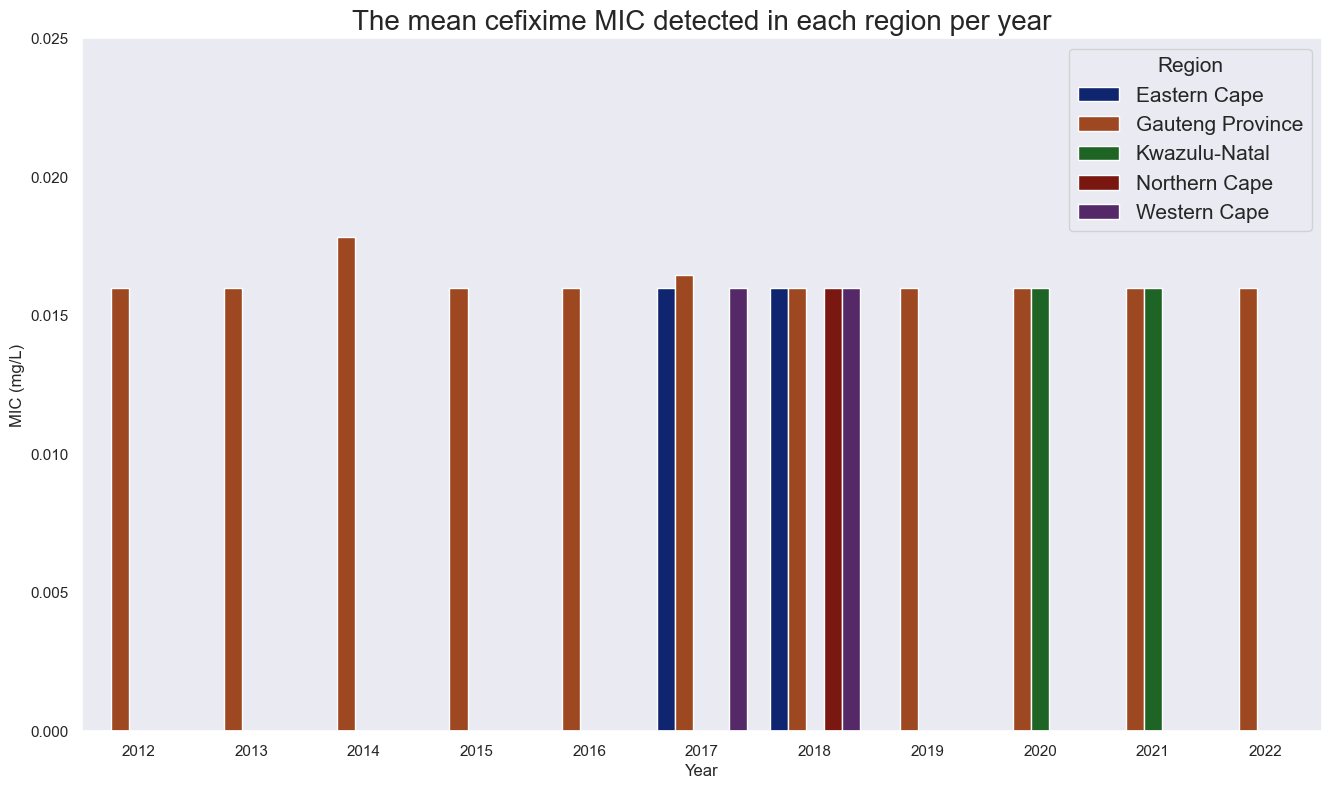

In [18]:
    # filtering for cefixime...
my_cef_mic: pd.DataFrame = my_amr_mic.drop(columns = ["azi_mic", "ceftri_mic"])

    # removing rows without MIC data
my_cef_mic_clean: pd.DataFrame = my_cef_mic.dropna(subset = "cef_mic")

    # creating a pivot table
my_cef_pivot: pd.DataFrame = my_cef_mic_clean.pivot_table(index = "year", columns = "region", values = "cef_mic", aggfunc = "mean")


    # melting the pivot table
my_cef_melt: pd.DataFrame = my_cef_pivot.reset_index().melt(id_vars = "year", var_name = "region", value_name = "cef_mic")


    # plotting bar graph with Seaborn
fig = plt.figure(figsize = (16,9))

sns.barplot(data = my_cef_melt, x = "year", y = "cef_mic", hue = "region", palette = "dark")

#plt.tight_layout()
plt.ylim(0, 0.025)
plt.xlabel("Year")
plt.ylabel("MIC (mg/L)")
plt.title("The mean cefixime MIC detected in each region per year", fontsize = 20)
plt.legend(title = "Region", title_fontsize = 15, fontsize = 15)

plt.show()



Same process as before, but with Cefixime MIC. The figure shows a very consistent mean MIC throughout the years and in each region.

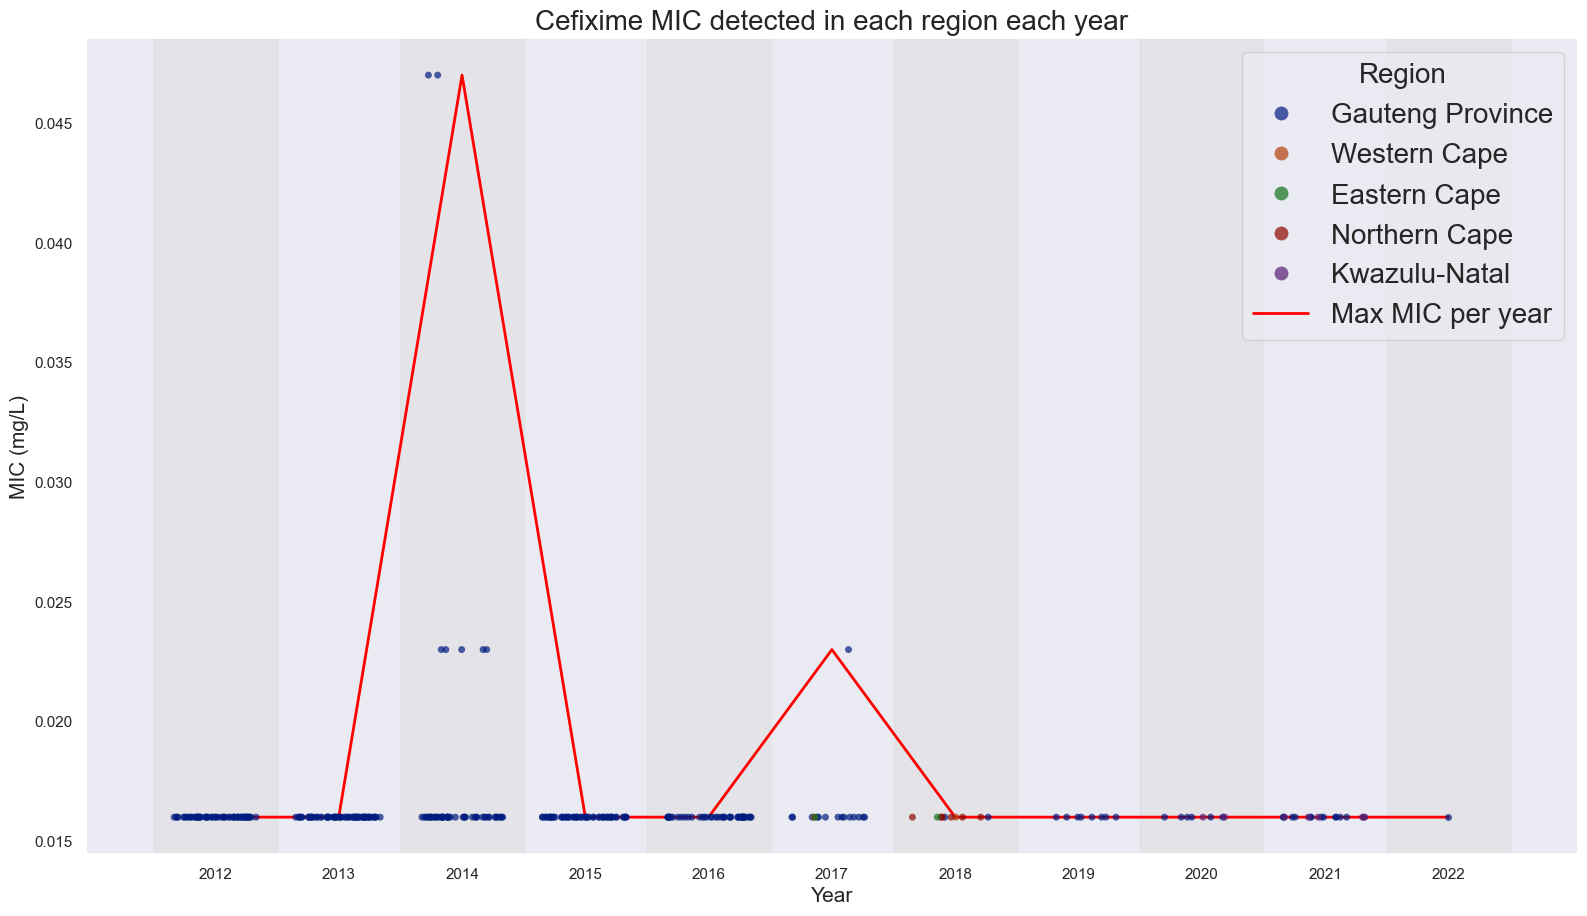

In [19]:
    # replacing NaNs in "region" columns
my_cef_mic_clean.loc[:, "region"] = my_cef_mic_clean["region"].fillna("NA")

    # extracting the maximum cefixime MIC each year 
max_cef_mic: pd.Series = my_cef_mic_clean.groupby("year")["cef_mic"].max().reset_index()

    # converting "year" to a categorical variable and aligning them to the "year" in my_cef_mic_clean
max_cef_mic["year"] = pd.Categorical(values = max_cef_mic["year"], categories = my_cef_mic_clean["year"].unique(), ordered = True)

    # setting a random seed
np.random.seed(21)

    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = my_cef_mic_clean, x = "year", y = "cef_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
plt.plot(max_cef_mic["year"].cat.codes, max_cef_mic["cef_mic"], color="red", linewidth=2, label="Max MIC per year")


    # extracting unique years
unique_years2 = my_cef_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(unique_years2):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
plt.title("Cefixime MIC detected in each region each year", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("MIC (mg/L)", fontsize = 15)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.show()


Now looking at the distribution of cefixime MIC in my South African sample, there are a few outlying MIC values. However, with the EUCAST cefixime breakpoint value being 0.125 mg/L, the ng population is still susceptible to the antimicrobial.

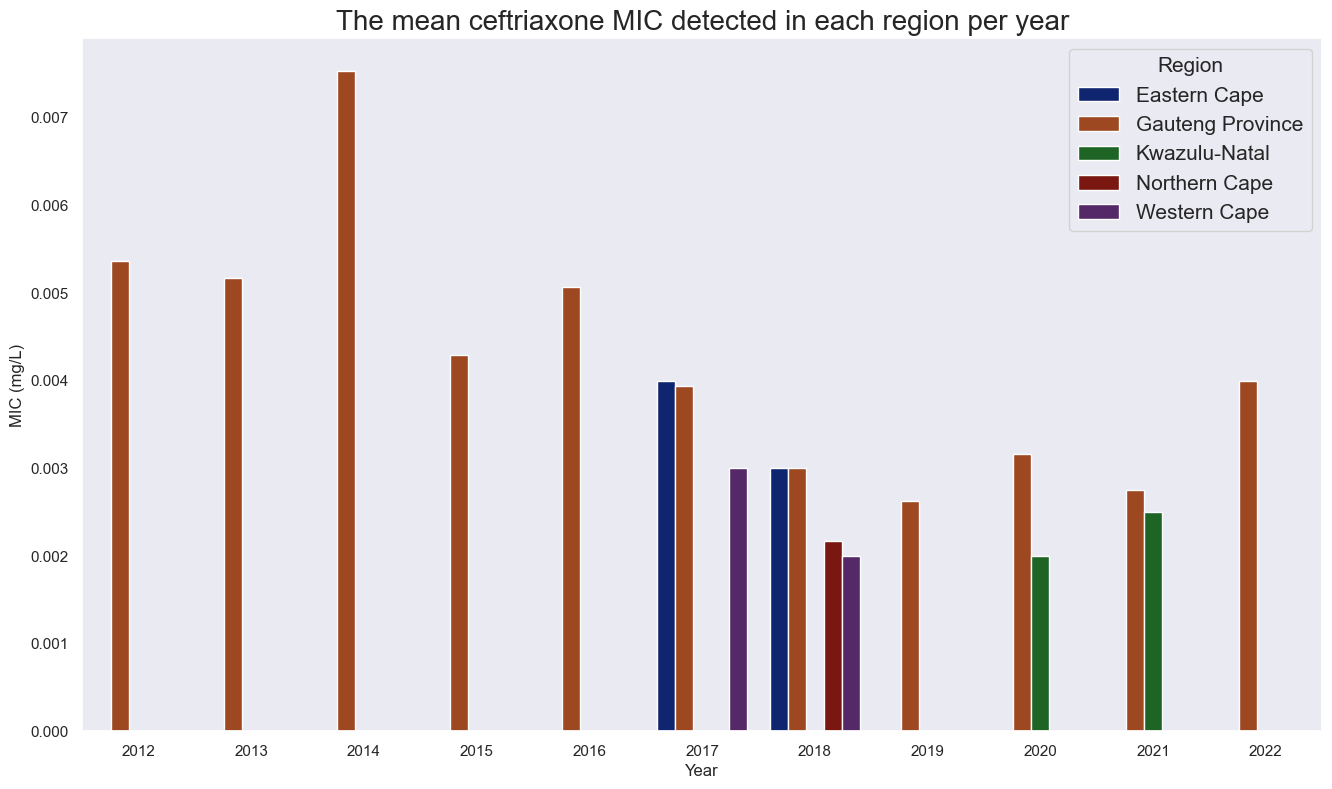

In [20]:
    # filtering for ceftriaxone... 
my_ceftri_mic: pd.DataFrame = my_amr_mic.drop(columns = ["azi_mic", "cef_mic"])

    # removing rows without MIC data
my_ceftri_mic_clean: pd.DataFrame = my_ceftri_mic.dropna(subset = "ceftri_mic")

    # creating a pivot table
my_ceftri_pivot: pd.DataFrame = my_ceftri_mic_clean.pivot_table(index = "year", columns = "region", values = "ceftri_mic", aggfunc = "mean")


    # melting the pivot table
my_ceftri_melt: pd.DataFrame = my_ceftri_pivot.reset_index().melt(id_vars = "year", var_name = "region", value_name = "ceftri_mic")


    # plotting bar graph with Seaborn
fig = plt.figure(figsize = (16,9))

sns.barplot(data = my_ceftri_melt, x = "year", y = "ceftri_mic", hue = "region", palette = "dark")

#plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("MIC (mg/L)")
plt.title("The mean ceftriaxone MIC detected in each region per year", fontsize = 20)
plt.legend(title = "Region", title_fontsize = 15, fontsize = 15)

plt.show()



Same process as before, but with Ceftriaxone MIC. The figure shows a very interesting sigmoidal pattern in Ceftriaxone MIC. Although the largest mean MIC is < 0.007 mg/L (2014), ceftriaxone MIC appears to be rising again, which needs to be investigated. 


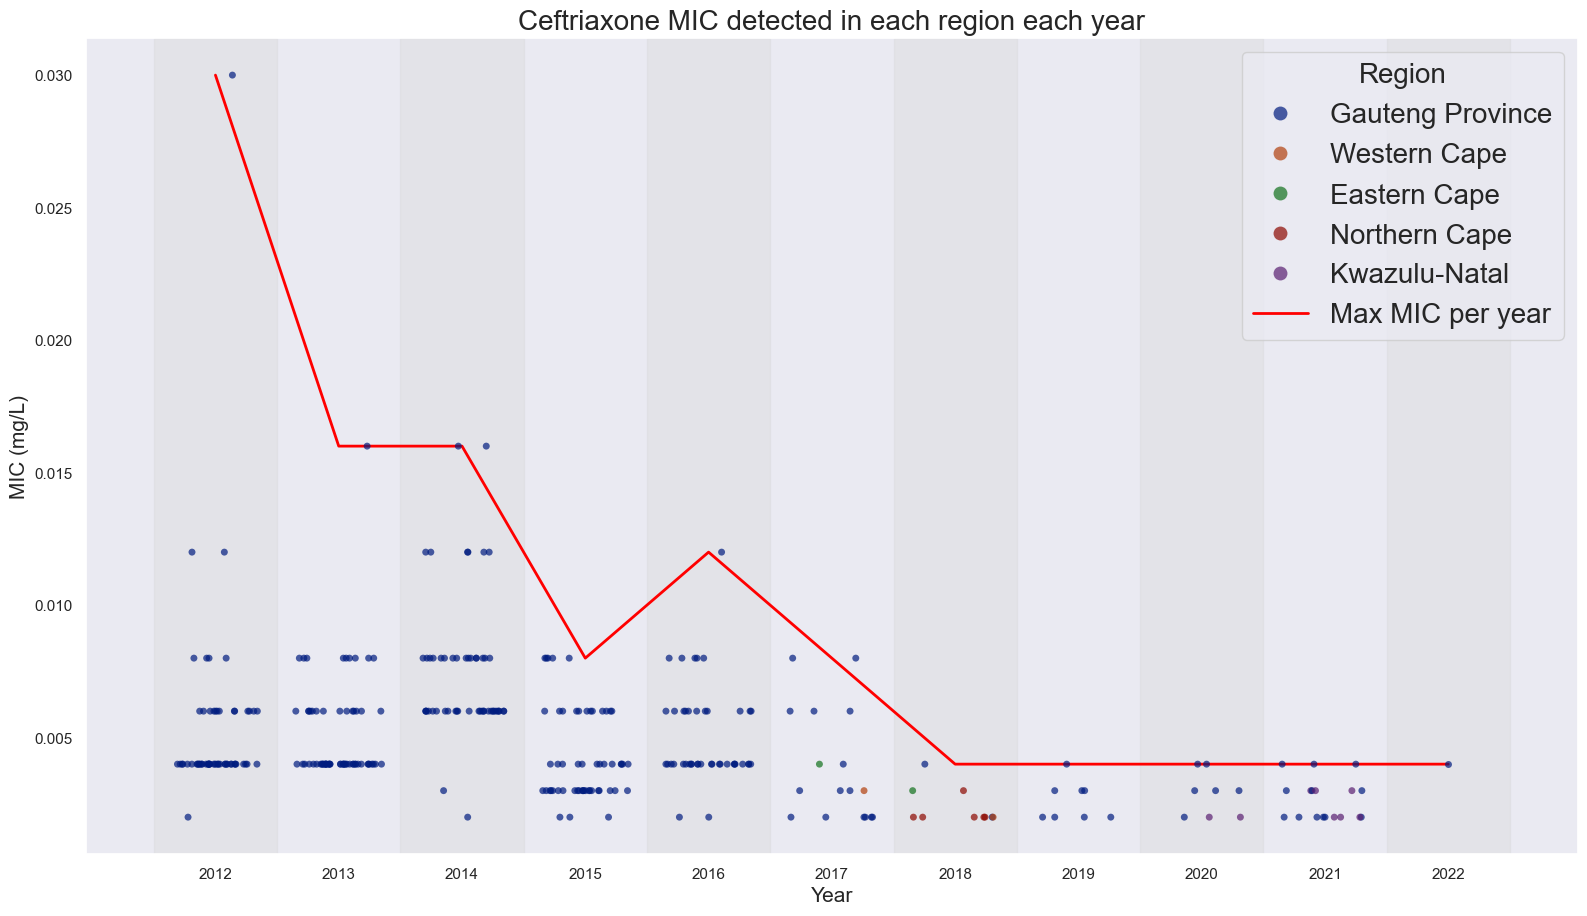

In [21]:
    # replacing NaNs in "region" columns
my_ceftri_mic_clean.loc[:, "region"] = my_ceftri_mic_clean["region"].fillna("NA")    
    
    # extracting the maximum ceftriaxone MIC each year 
max_ceftri_mic: pd.Series = my_ceftri_mic_clean.groupby("year")["ceftri_mic"].max().reset_index()

    # converting "year" to a categorical variable and aligning them to the "year" in my_ceftri_mic_clean
max_ceftri_mic["year"] = pd.Categorical(values = max_ceftri_mic["year"], categories = my_ceftri_mic_clean["year"].unique(), ordered = True)


    # setting a random seed
np.random.seed(123)

    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = my_ceftri_mic_clean, x = "year", y = "ceftri_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
plt.plot(max_ceftri_mic["year"].cat.codes, max_ceftri_mic["ceftri_mic"], color="red", linewidth=2, label="Max MIC per year")


    # extracting unique years
unique_years3 = my_ceftri_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(unique_years3):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
plt.title("Ceftriaxone MIC detected in each region each year", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("MIC (mg/L)", fontsize = 15)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.show()


Once looking at the distribution of MIC values, the sigmoidal pattern is lost and can be explained by the small sample size in later years. With only 1 MIC value recorded for 2022, the mean MIC is equal to that value, which leads to the impression of a climb in MIC. Nevertheless, there is evidently a decline between 2012-2018 in the max MIC values observed, which is still a point of interest. Furthermore, with a EUGASP ciprofloxacin breakpoint of 0.125 (mg/L), the population is still very susceptible.

In [22]:
    #
my_azi_mean: pd.DataFrame = pd.DataFrame(my_azi_pivot.mean(axis = 1))

my_azi_mean.rename(columns = {0: "mean_mic"}, inplace = True)

my_azi_mean["antimicrobial"] = "azithromycin"
    
    #  
my_cef_mean: pd.DataFrame = pd.DataFrame(my_cef_pivot.mean(axis = 1))

my_cef_mean.rename(columns = {0: "mean_mic"}, inplace = True)

my_cef_mean["antimicrobial"] = "cefixime"


    #
my_ceftri_mean: pd.DataFrame = pd.DataFrame(my_ceftri_pivot.mean(axis = 1))

my_ceftri_mean.rename(columns = {0: "mean_mic"}, inplace = True)

my_ceftri_mean["antimicrobial"] = "ceftriaxone"


    # concat
my_mic_means: pd.DataFrame = pd.concat([my_azi_mean, my_cef_mean, my_ceftri_mean], axis = 0, join = "outer")

my_mic_means.reset_index(inplace = True)


Here, I have calculated the TOTAL mean MIC for each antimicrobial and merged them into a single DataFrame.

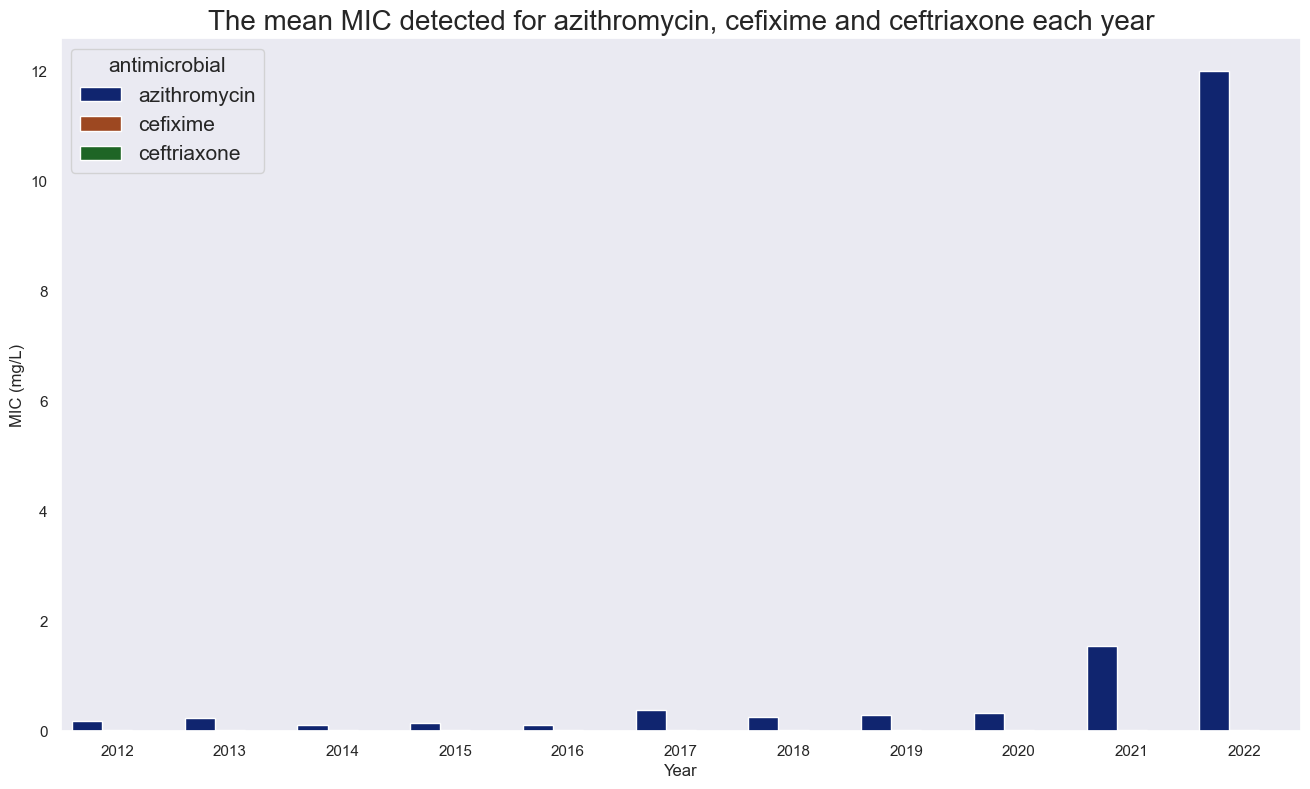

In [23]:
    # plotting bar graph with Seaborn
fig = plt.figure(figsize = (16,9))

sns.barplot(data = my_mic_means, x = "year", y = "mean_mic", hue = "antimicrobial", palette = "dark")

#plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("MIC (mg/L)")
plt.title("The mean MIC detected for azithromycin, cefixime and ceftriaxone each year", fontsize = 20)
plt.legend(title = "antimicrobial", title_fontsize = 15, fontsize = 15)

plt.show()


This figure is supposed to show the mean MIC for Azithromycin, Cefixime and Ceftriaxone across the sampling period 2012-2022. However, because Azithromycin MIC is much higher than Cefixime and Ceftriaxone, the latter two antimicrobial MICs are not visible. This figure will likely not be included in my write-up (unless I find an alternative). 

#### Other South African collections


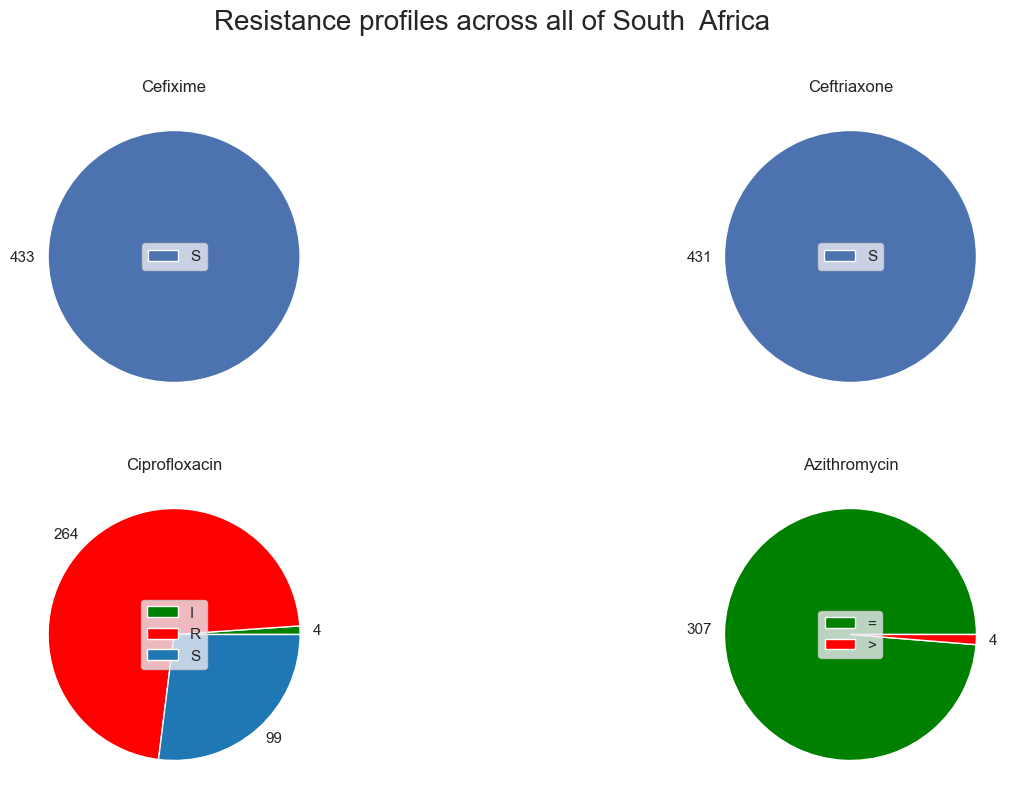

In [24]:
    # Same set of operations for phenotypic AMR data for the whole of South Africa, including my data
    
    # importing...
sa_amr: pd.DataFrame = pd.read_csv("Data/sa_amr_prof.csv", sep = ",", header = "infer")
#sa_amr.head()

    # renaming columns...
sa_amr.rename(columns = {"azithromycin_mic_sign": "azi_sign", 'cefixime_SIR': "cef_sir", 'ceftriaxone_SIR': "ceftri_sir", "ciprofloxacin_SIR": "cipro_sir"}, inplace = True)
#sa_amr.head()

    # separating data by antimicrobial...
sa_azi = sa_amr.azi_sign.dropna(axis = 0, how = "any")
sa_cef = sa_amr.cef_sir.dropna(axis = 0, how = "any")
sa_ceftri = sa_amr.ceftri_sir.dropna(axis = 0, how = "any")
sa_cipro = sa_amr.cipro_sir.dropna(axis = 0, how = "any")


    # counting frequency of S/I/R or </=/>...
amr_azi2 = sa_azi.groupby(sa_azi).count()
#print(amr_azi2)

amr_cef2 = sa_cef.groupby(sa_cef).count()
#print(amr_cef2)

amr_ceftri2 = sa_ceftri.groupby(sa_ceftri).count()
#print(amr_ceftri2)

amr_cipro2 = sa_cipro.groupby(sa_cipro).count()
#print(amr_cipro2)


    # creating a figure...
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # cefixime
Functions.pie(data = amr_cef2, title = "Cefixime", ax = ax[0,0])

    # ceftriaxone
Functions.pie(data = amr_ceftri2, title = "Ceftriaxone", ax = ax[0,1])

    # ciprofloxacin
Functions.pie(data = amr_cipro2, title = "Ciprofloxacin", ax = ax[1,0],   colors = ["green", "red", "#1f77b4"])

    # azithromycin
Functions.pie(data = amr_azi2, title = "Azithromycin", ax = ax[1,1], colors = ["green", "red"])

    # adding a title to the figure
fig.suptitle("Resistance profiles across all of South  Africa", fontsize = 20)

plt.show()


This figure depicts the same type of information as the above figure, however represents *all* South African isolates available on PubMLST.

##### MIC through time

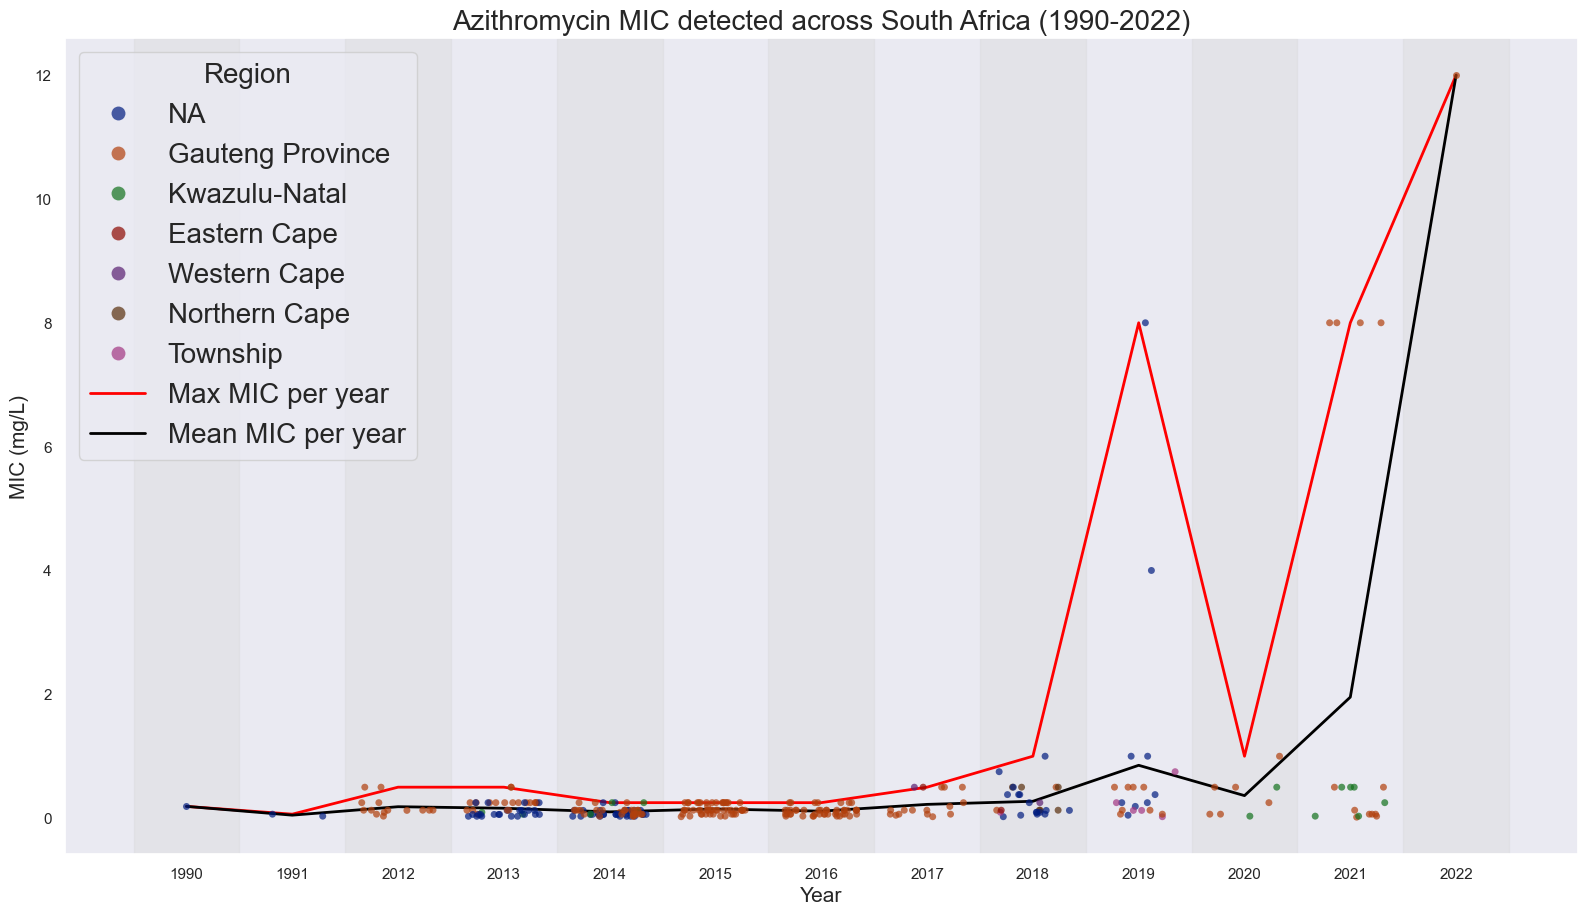

In [25]:
    # importing MIC data
sa_amr_mic: pd.DataFrame = pd.read_csv("Data/sa_amr_mic.csv", sep = ",", header = "infer")

    # cleaning function
Functions.clean(df = sa_amr_mic, rename_cols = {"azithromycin_mic": "azi_mic", "cefixime_mic": "cef_mic", "ceftriaxone_mic": "ceftri_mic"}, replace_val = {"Gauteng": "Gauteng Province", "KwaZulu Natal": "Kwazulu-Natal", "KwaZulu-Natal": "Kwazulu-Natal"})

    
    # filtering for azithromycin MIC data 
sa_azi_mic: pd.DataFrame = sa_amr_mic.drop(columns = ["cef_mic", "ceftri_mic"])

    # removing rows without MIC data
sa_azi_mic_clean: pd.DataFrame = sa_azi_mic.dropna(subset = "azi_mic")

    # replacing NaNs in "region" columns
sa_azi_mic_clean.loc[:, "region"] = sa_azi_mic_clean["region"].fillna("NA")


    # extracting the maximum azithromycin MIC each year 
sa_max_azi_mic: pd.Series = sa_azi_mic_clean.groupby("year")["azi_mic"].max().reset_index()

    # extracting the mean azithromycin MIC each year
sa_mean_azi_mic: pd.Series = sa_azi_mic_clean.groupby("year")["azi_mic"].mean().reset_index()


    # ordering by year in sa_azi_mic_clean
sa_azi_mic_clean = sa_azi_mic_clean.sort_values(by = "year", axis = 0,ascending = True)

    # converting "year" to a categorical variable and aligning them to the "year" in sa_azi_mic_clean
sa_max_azi_mic["year"] = pd.Categorical(values = sa_max_azi_mic["year"], categories = sa_azi_mic_clean["year"].unique(), ordered = True)

sa_mean_azi_mic["year"] = pd.Categorical(values = sa_mean_azi_mic["year"], categories = sa_azi_mic_clean["year"].unique(), ordered = True)

    # converting "year" in sa_azi_mic_clean to an integer to remove decimal points
sa_azi_mic_clean["year"] = sa_azi_mic_clean["year"].astype(int)


    # setting a random seed
np.random.seed(212)

    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = sa_azi_mic_clean, x = "year", y = "azi_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
plt.plot(sa_max_azi_mic["year"].cat.codes, sa_max_azi_mic["azi_mic"], color="red", linewidth=2, label="Max MIC per year")
    # adding a line for mean MIC values each year
plt.plot(sa_mean_azi_mic["year"].cat.codes, sa_mean_azi_mic["azi_mic"], color="black", linewidth=2, label="Mean MIC per year")

    # extracting unique years
sa_unique_years = sa_azi_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(sa_unique_years):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
plt.title("Azithromycin MIC detected across South Africa (1990-2022)", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("MIC (mg/L)", fontsize = 15)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.show()


This is a strip plot for Azithromycin MIC through time across the whole of South Africa. There appears to be an emergence of AMR to Azithromycin, with a few isolates displaying disproportionately high MICs that are well above the EUCAST ECOFF of 1 mg/L. With the greatest MIC (12 mg/L) being observed in 2022, this is a concerning pattern.

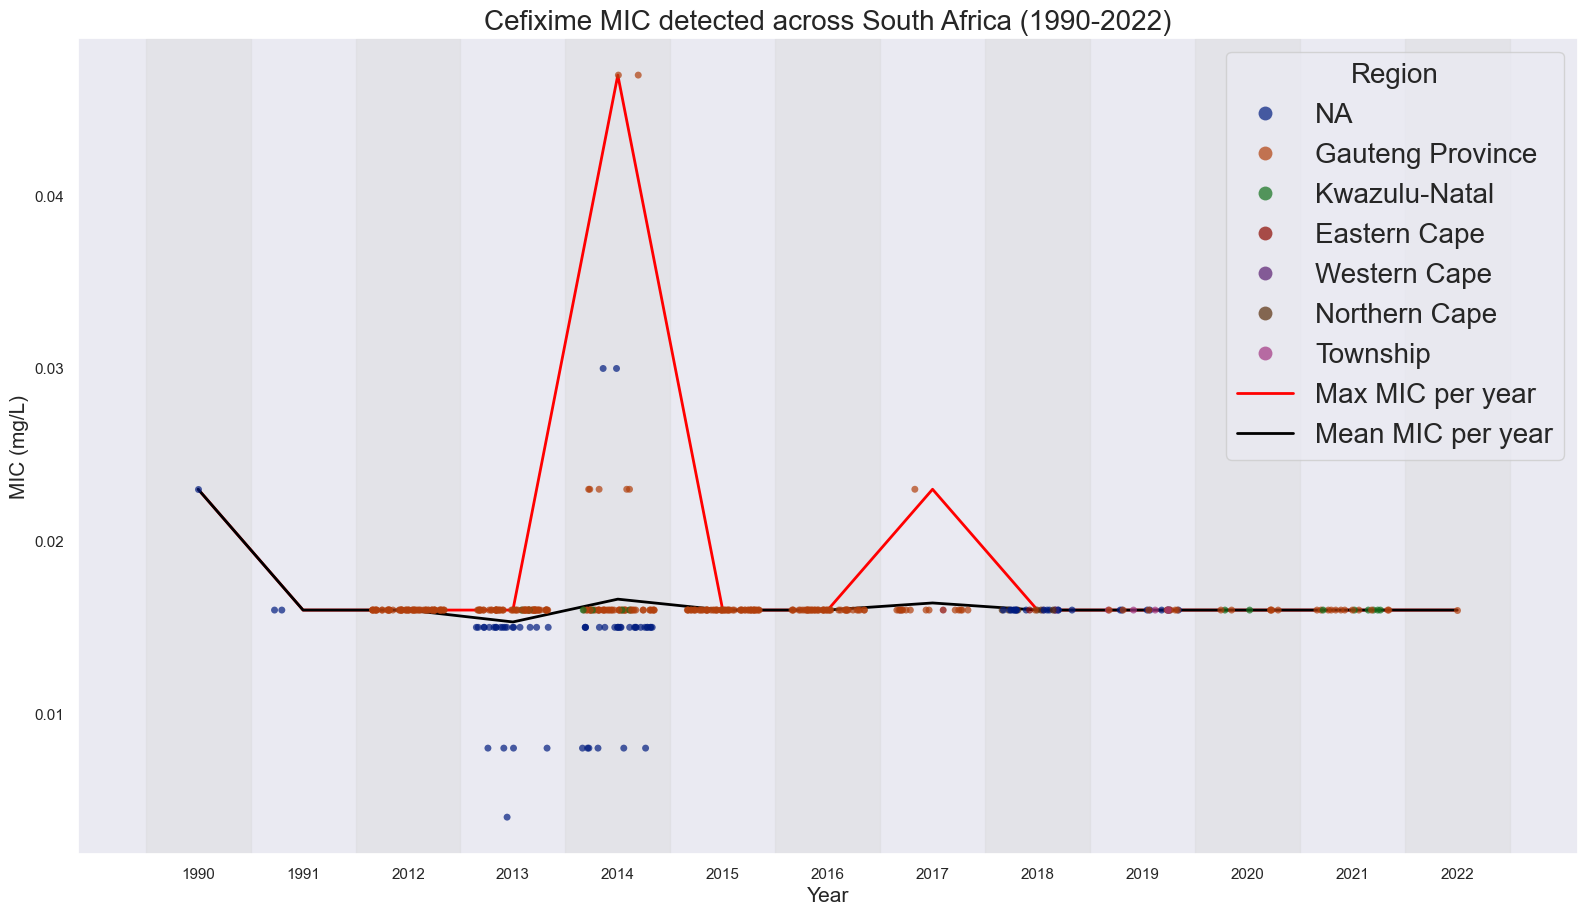

In [26]:
    # filtering for cefixime MIC data 
sa_cef_mic: pd.DataFrame = sa_amr_mic.drop(columns = ["azi_mic", "ceftri_mic"])

    # removing rows without MIC data
sa_cef_mic_clean: pd.DataFrame = sa_cef_mic.dropna(subset = "cef_mic")

    # replacing NaNs in "region" columns
sa_cef_mic_clean.loc[:, "region"] = sa_cef_mic_clean["region"].fillna("NA")


    # extracting the maximum cefixime MIC each year 
sa_max_cef_mic: pd.Series = sa_cef_mic_clean.groupby("year")["cef_mic"].max().reset_index()
 
    # extracting the mean cefixime MIC each year
sa_mean_cef_mic: pd.Series = sa_cef_mic_clean.groupby("year")["cef_mic"].mean().reset_index()


    # ordering by year in sa_cef_mic_clean
sa_cef_mic_clean = sa_cef_mic_clean.sort_values(by = "year", axis = 0,ascending = True)

    # converting "year" to a categorical variable and aligning them to the "year" in sa_cef_mic_clean
sa_max_cef_mic["year"] = pd.Categorical(values = sa_max_cef_mic["year"], categories = sa_cef_mic_clean["year"].unique(), ordered = True)

sa_mean_cef_mic["year"] = pd.Categorical(values = sa_mean_cef_mic["year"], categories = sa_cef_mic_clean["year"].unique(), ordered = True)

    # converting "year" in sa_azi_mic_clean to an integer to remove decimal points
sa_cef_mic_clean["year"] = sa_cef_mic_clean["year"].astype(int)


    # setting the random seed
np.random.seed(121)    
    
    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = sa_cef_mic_clean, x = "year", y = "cef_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
plt.plot(sa_max_cef_mic["year"].cat.codes, sa_max_cef_mic["cef_mic"], color="red", linewidth=2, label="Max MIC per year")
    # adding a line for mean MIC values each year
plt.plot(sa_mean_cef_mic["year"].cat.codes, sa_mean_cef_mic["cef_mic"], color="black", linewidth=2, label="Mean MIC per year")


    # extracting unique years
sa_unique_years2 = sa_cef_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(sa_unique_years2):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
plt.title("Cefixime MIC detected across South Africa (1990-2022)", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("MIC (mg/L)", fontsize = 15)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.show()


This is a strip plot of cefixime MIC through time across the whole of South Africa. For the most part, MIC has been very stable and at low levels. There are a few isolates (2014 & 2017) that display a higher MIC than the average isolate, however they are still well below the EUCAST breakpoint of 0.125 mg/L so aren't of much concern. 

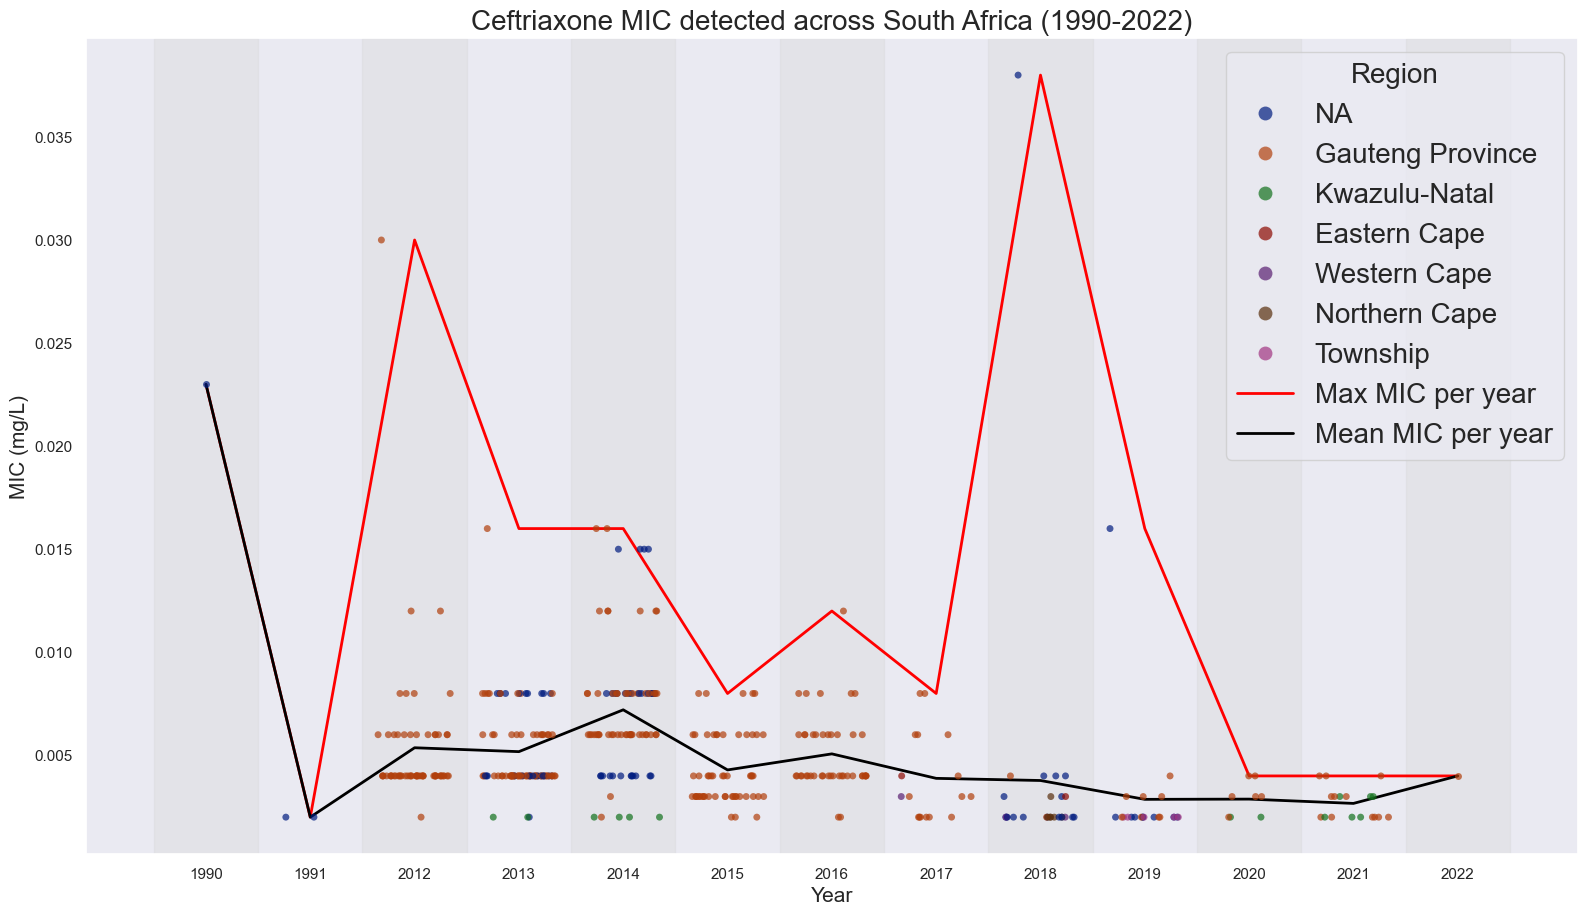

In [27]:
    # filtering for ceftriaxone MIC data 
sa_ceftri_mic: pd.DataFrame = sa_amr_mic.drop(columns = ["azi_mic", "cef_mic"])

    # removing rows without MIC data
sa_ceftri_mic_clean: pd.DataFrame = sa_ceftri_mic.dropna(subset = "ceftri_mic")

    # replacing NaNs in "region" columns
sa_ceftri_mic_clean.loc[:, "region"] = sa_ceftri_mic_clean["region"].fillna("NA")


    # extracting the maximum ceftriaxone MIC each year 
sa_max_ceftri_mic: pd.Series = sa_ceftri_mic_clean.groupby("year")["ceftri_mic"].max().reset_index()

    # extracting the mean ceftriaxone MIC each year
sa_mean_ceftri_mic: pd.Series = sa_ceftri_mic_clean.groupby("year")["ceftri_mic"].mean().reset_index()


    # ordering by year in sa_ceftri_mic_clean
sa_ceftri_mic_clean = sa_ceftri_mic_clean.sort_values(by = "year", axis = 0,ascending = True)

    # converting "year" to a categorical variable and aligning them to the "year" in sa_ceftri_mic_clean
sa_max_ceftri_mic["year"] = pd.Categorical(values = sa_max_ceftri_mic["year"], categories = sa_ceftri_mic_clean["year"].unique(), ordered = True)

sa_mean_ceftri_mic["year"] = pd.Categorical(values = sa_mean_ceftri_mic["year"], categories = sa_ceftri_mic_clean["year"].unique(), ordered = True)

    # converting "year" in sa_azi_mic_clean to an integer to remove decimal points
sa_ceftri_mic_clean["year"] = sa_ceftri_mic_clean["year"].astype(int)


    # setting the random seed
np.random.seed(313)    
    
    # plotting the graph
sns.set_theme(style = "dark")

fig = plt.figure(figsize = (16,9))
    
    # strip plot
sns.stripplot(data = sa_ceftri_mic_clean, x = "year", y = "ceftri_mic", hue = "region", palette = "dark", alpha = 0.7, jitter = 0.35)

    # adding a line for max MIC values each year
plt.plot(sa_max_ceftri_mic["year"].cat.codes, sa_max_ceftri_mic["ceftri_mic"], color="red", linewidth=2, label="Max MIC per year")
    # adding a line for mean MIC values each year
plt.plot(sa_mean_ceftri_mic["year"].cat.codes, sa_mean_ceftri_mic["ceftri_mic"], color="black", linewidth=2, label="Mean MIC per year")

    # extracting unique years
sa_unique_years3 = sa_ceftri_mic_clean["year"].unique()

    # visually separating years with alternating rectangles 
for i, year in enumerate(sa_unique_years3):
        if i % 2 == 0:
            plt.axvspan(i - 0.5, i + 0.5, color='lightgrey', alpha=0.3)
        

plt.tight_layout()
plt.title("Ceftriaxone MIC detected across South Africa (1990-2022)", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("MIC (mg/L)", fontsize = 15)
plt.legend(title = "Region", title_fontsize = 20, fontsize = 20, markerscale = 2)

plt.show()


This is a strip plot of ceftriaxone MIC through time across the whole of South Africa. Like cefixime, the MIC of ceftriaxone is consistently low, with only a couple of outlying strains. With a EUCAST breakpoint of 0.125 mg/L, the population is still susceptible to ceftriaxone. 

### LIN Code

#### South African collection

In [29]:
    # Import LIN code data
my_lin: pd.DataFrame = pd.read_csv("Data/mydata_cgmlst_lin.csv", sep = ",", header = "infer")
#my_lin

    
    # Cleaning the dataframe...
Functions.clean(my_lin, rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst", "LINcode (N. gonorrhoeae cgMLST v2).1": "LIN1"}, drop_col = list(range(5,15)), replace_val = {"_": np.nan, "__": np.nan, "___": np.nan})
    
    # Making LIN code prefixes categorical variables
my_lin.LIN1 = my_lin.LIN1.astype(str)
my_lin.LIN2 = my_lin.LIN2.astype(str)
my_lin.LIN3 = my_lin.LIN3.astype(str)
my_lin.LIN4 = my_lin.LIN4.astype(str)
#my_lin


    # Parsing out entries with no cgST/LIN code 
my_lin_missing = my_lin[my_lin["cgst"].isnull()]
#my_lin_missing
    # Counting the number of entries with no cgST/LIN code
my_lin_missing_count: pd.DataFrame = my_lin.isnull().sum()
#my_lin_missing_count

    # Identifying the entries with cgST/LIN code information
my_lin_clean: pd.DataFrame = my_lin.dropna(subset = "lincode")
print(f"There are {len(my_lin_clean["LIN3"].unique())} unique lineages.")
print(f"There are {len(my_lin_clean["LIN4"].unique())} unique clonal groups.")

    # counting the proportion of each LIN code prefix (1 bin(s))
my_lin_prop1: pd.Series = Functions.LIN_prop(df = my_lin_clean, var = "LIN1")

    # 2 bin(s)
my_lin_prop2: pd.Series = Functions.LIN_prop(df = my_lin_clean, var = "LIN2")
    
    # 3 bin(s)
my_lin_prop3: pd.Series = Functions.LIN_prop(df = my_lin_clean, var = "LIN3")

    # 4 bin(s)
my_lin_prop4: pd.Series = Functions.LIN_prop(df = my_lin_clean, var = "LIN4")


There are 54 unique lineages.
There are 151 unique clonal groups.


Here I have imported a dataset containing cgMSLT ST and LIN code information my South African isolates. I conducted some operations on this data:

1) Created a "missing" version of the dataset, containing rows for isolates with no cgMLST ST/LIN code.
2) Created a "cleaned" version of the dataset that only contains rows with cgMLST ST and LIN code for isolates.
3) Created a set of series containing proportion information for prefixes of 1-4 bins.
4) In each series, squashed prefixes that have a frequency of <= 3% into a new label, "Other".

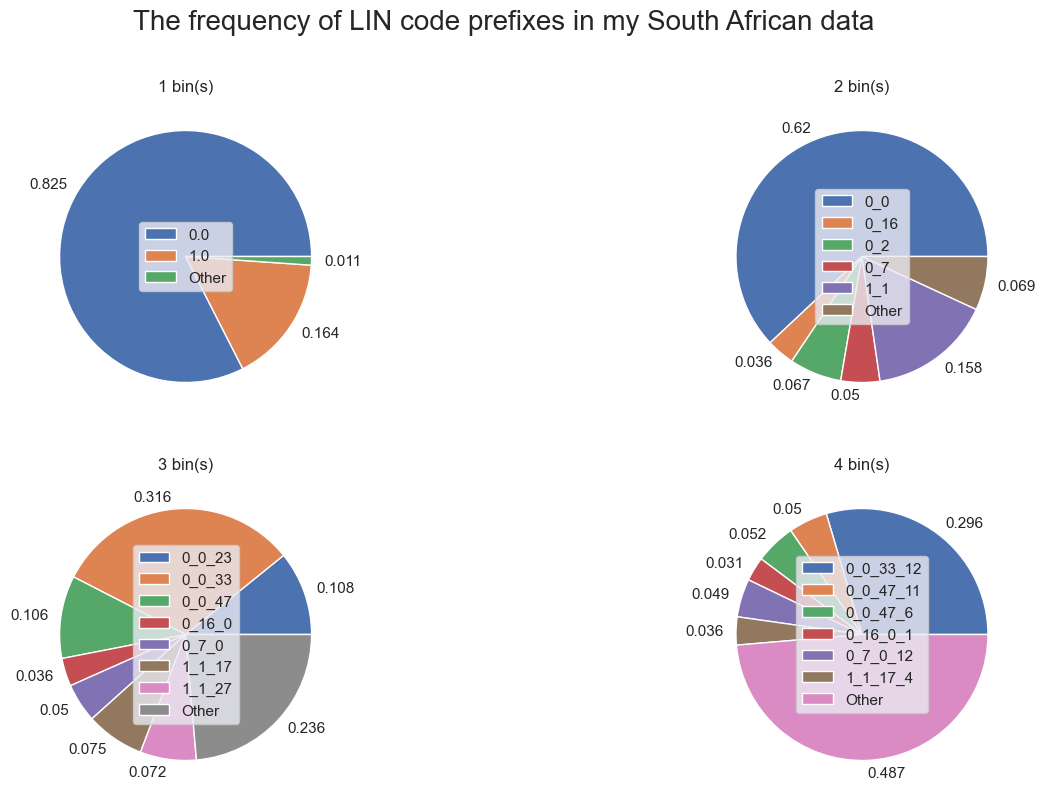

In [30]:
    # creating a figure with 4 subplots
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # creating a pie chart showing proportions of LIN code prefixes with 1 bin(s)
Functions.pie(data = my_lin_prop1, title = "1 bin(s)", ax = ax[0,0])

    # ...prefixes with 2 bin(s)
Functions.pie(data = my_lin_prop2, title = "2 bin(s)", ax = ax[0,1])

    # ...prefixes with 3 bin(s)
Functions.pie(data = my_lin_prop3, title = "3 bin(s)", ax = ax[1,0])

    # ...prefixes with 4 bin(s)
Functions.pie(data = my_lin_prop4, title = "4 bin(s)", ax = ax[1,1])

fig.suptitle("The frequency of LIN code prefixes in my South African data", fontsize = 20)

plt.show()

I have created a figure with 4 subplots. Each is a pie chart showing the proportion of LIN code prefixes (at a certain number of bins) in my South African dataset.

##### Lineage 0_0_33

In [31]:
    # importing metadata for 0_0_33 isolates
all_0_0_33: pd.DataFrame = pd.read_csv("Data/all_0_0_33.csv", sep = ",", header = "infer")

    # finding the mean/median/max azithromycin MICs in this lineage
print(f'''Azithromycin MIC mean: {np.nanmean(all_0_0_33["azithromycin_mic"]):.3f}
median: {np.nanmedian(all_0_0_33["azithromycin_mic"])}
max: {np.max(all_0_0_33["azithromycin_mic"])}
Number of resistant isolates: {len(all_0_0_33[all_0_0_33["azithromycin_mic"] > 1])}''')

#all_0_0_33[all_0_0_33["azithromycin_mic"] >= 1]


Azithromycin MIC mean: 0.142
median: 0.125
max: 1.5
Number of resistant isolates: 1


In [32]:
    # finding the mean/median/max Cefixime MICs in this lineage
print(f'''Cefixime MIC mean: {np.nanmean(all_0_0_33["cefixime_mic"]):.3f}
median: {np.nanmedian(all_0_0_33["cefixime_mic"])}
max: {np.max(all_0_0_33["cefixime_mic"])}
Number of resistant isolates: {len(all_0_0_33[all_0_0_33["cefixime_mic"] > 0.125])}''')

#all_0_0_33[all_0_0_33["cefixime_mic"] >= 0.125]


Cefixime MIC mean: 0.024
median: 0.016
max: 1.0
Number of resistant isolates: 9


In [33]:
    # finding the mean/median/max ceftriaxone MICs in this lineage
print(f'''Ceftriaxone MIC mean: {np.nanmean(all_0_0_33["ceftriaxone_mic"]):.3f}
median: {np.nanmedian(all_0_0_33["ceftriaxone_mic"])}
max: {np.max(all_0_0_33["ceftriaxone_mic"])}
Number of resistant isolates: {len(all_0_0_33[all_0_0_33["ceftriaxone_mic"] > 0.125])}''')

#all_0_0_33[all_0_0_33["ceftriaxone_mic"] >= 0.125]


Ceftriaxone MIC mean: 0.014
median: 0.008
max: 0.5
Number of resistant isolates: 5


I have imported data for all PubMLST isolates from lineage 0_0_33, including their MIC values for azithromycin, cefixime and ceftriaxone. 

In [34]:
    # finding the max MIC across isolates in this lineage from my SA isolates
res_0_0_33: pd.DataFrame = my_amr_mic[my_amr_mic["id"].isin(my_lin[my_lin["LIN3"] == "0_0_33"]["id"])]

print(f'''Azithromycin max MIC: {np.max(res_0_0_33["azi_mic"])}
Cefixime max MIC: {np.max(res_0_0_33["cef_mic"])}
Ceftriaxone max MIC: {np.max(res_0_0_33["ceftri_mic"])}
''')

Azithromycin max MIC: 0.5
Cefixime max MIC: 0.047
Ceftriaxone max MIC: 0.016



I have also looked at the isolates from lineage 0_0_33 that are part of my South African collection.

##### Lineage 0_0_23

In [35]:
    # importing metadata for 0_0_23 isolates
all_0_0_23: pd.DataFrame = pd.read_csv("Data/all_0_0_23.csv", sep = ",", header = "infer")

    # finding the mean/median/max MIC for azithromycin in this lineage
print(f'''Azithromycin MIC mean: {np.nanmean(all_0_0_23["azithromycin_mic"]):.3f}
median: {np.nanmedian(all_0_0_23["azithromycin_mic"])}
max: {np.max(all_0_0_23["azithromycin_mic"])}
Number of resistant isolates: {len(all_0_0_23[all_0_0_23["azithromycin_mic"] > 1])}''')

#all_0_0_23[all_0_0_23["azithromycin_mic"] == 1]


Azithromycin MIC mean: 0.309
median: 0.25
max: 1.0
Number of resistant isolates: 0


In [36]:
    # finding the mean/median/max MIC for cefixime in this lineage
print(f'''Cefixime MIC mean: {np.nanmean(all_0_0_23["cefixime_mic"]):.3f}
median: {np.nanmedian(all_0_0_23["cefixime_mic"])}
max: {np.max(all_0_0_23["cefixime_mic"])}
Number of resistant isolates: {len(all_0_0_23[all_0_0_23["cefixime_mic"] > 0.125])}''')


Cefixime MIC mean: 0.016
median: 0.016
max: 0.023
Number of resistant isolates: 0


In [37]:
    # finding the mean/median/max MIC for ceftriaxone in this lineage
print(f'''Ceftriaxone MIC mean: {np.nanmean(all_0_0_23["ceftriaxone_mic"]):.3f}
median: {np.nanmedian(all_0_0_23["ceftriaxone_mic"])}
max: {np.max(all_0_0_23["ceftriaxone_mic"])}
Number of resistant isolates: {len(all_0_0_23[all_0_0_23["ceftriaxone_mic"] > 0.125])}''')


Ceftriaxone MIC mean: 0.004
median: 0.004
max: 0.012
Number of resistant isolates: 0


I have imported data for all PubMLST isolates from lineage 0_0_23, including their MIC values for azithromycin, cefixime and ceftriaxone. 


In [38]:
    # finding the max MIC across isolates in this lineage from my SA isolates
res_0_0_23: pd.DataFrame = my_amr_mic[my_amr_mic["id"].isin(my_lin[my_lin["LIN3"] == "0_0_23"]["id"])]

print(f'''Azithromycin max MIC: {np.max(res_0_0_23["azi_mic"])}
Cefixime max MIC: {np.max(res_0_0_23["cef_mic"])}
Ceftriaxone max MIC: {np.max(res_0_0_23["ceftri_mic"])}
''')


Azithromycin max MIC: 1.0
Cefixime max MIC: 0.023
Ceftriaxone max MIC: 0.012



I have also looked at the isolates from lineage 0_0_23 that are part of my South African collection.

##### Lineage 0_0_47

In [39]:
    # importing metadata for 0_0_47 isolates
all_0_0_47: pd.DataFrame = pd.read_csv("Data/all_0_0_47.csv", sep = ",", header = "infer")

    # finding the mean/median/max MIC values for azithromycin in this lineage
print(f'''Azithromycin MIC mean: {np.nanmean(all_0_0_47["azithromycin_mic"]):.3f}
median: {np.nanmedian(all_0_0_47["azithromycin_mic"])}
max: {np.max(all_0_0_47["azithromycin_mic"])}
Number of resistant isolates: {len(all_0_0_47[all_0_0_47["azithromycin_mic"] > 1])}''')

#all_0_0_47[all_0_0_47["azithromycin_mic"] >= 1]


Azithromycin MIC mean: 0.250
median: 0.128
max: 4.0
Number of resistant isolates: 1


In [40]:
    # finding the mean/median/max MIC values for cefixime in this lineage
print(f'''Cefixime MIC mean: {np.nanmean(all_0_0_47["cefixime_mic"]):.3f}
median: {np.nanmedian(all_0_0_47["cefixime_mic"])}
max: {np.max(all_0_0_47["cefixime_mic"])}
Number of resistant isolates: {len(all_0_0_47[all_0_0_47["cefixime_mic"] > 0.125])}''')


Cefixime MIC mean: 0.021
median: 0.016
max: 0.047
Number of resistant isolates: 0


In [41]:
    # finding the mean/median/max MIC values for ceftriaxone in this lineage
print(f'''Ceftriaxone MIC mean: {np.nanmean(all_0_0_47["ceftriaxone_mic"]):.3f}
median: {np.nanmedian(all_0_0_47["ceftriaxone_mic"])}
max: {np.max(all_0_0_47["ceftriaxone_mic"])}
Number of resistant isolates: {len(all_0_0_47[all_0_0_47["ceftriaxone_mic"] > 1])}''')


Ceftriaxone MIC mean: 0.013
median: 0.008
max: 0.064
Number of resistant isolates: 0


I have imported data for all PubMLST isolates from lineage 0_0_47, including their MIC values for azithromycin, cefixime and ceftriaxone. 


In [42]:
    # finding the max MIC across isolates in this lineage from my SA isolates
res_0_0_47: pd.DataFrame = my_amr_mic[my_amr_mic["id"].isin(my_lin[my_lin["LIN3"] == "0_0_47"]["id"])]

print(f'''Azithromycin max MIC: {np.max(res_0_0_47["azi_mic"])}
Cefixime max MIC: {np.max(res_0_0_47["cef_mic"])}
Ceftriaxone max MIC: {np.max(res_0_0_47["ceftri_mic"])}
''')


Azithromycin max MIC: 0.25
Cefixime max MIC: 0.016
Ceftriaxone max MIC: 0.016



I have also looked at the isolates from lineage 0_0_47 that are part of my South African collection.

#### Other collections

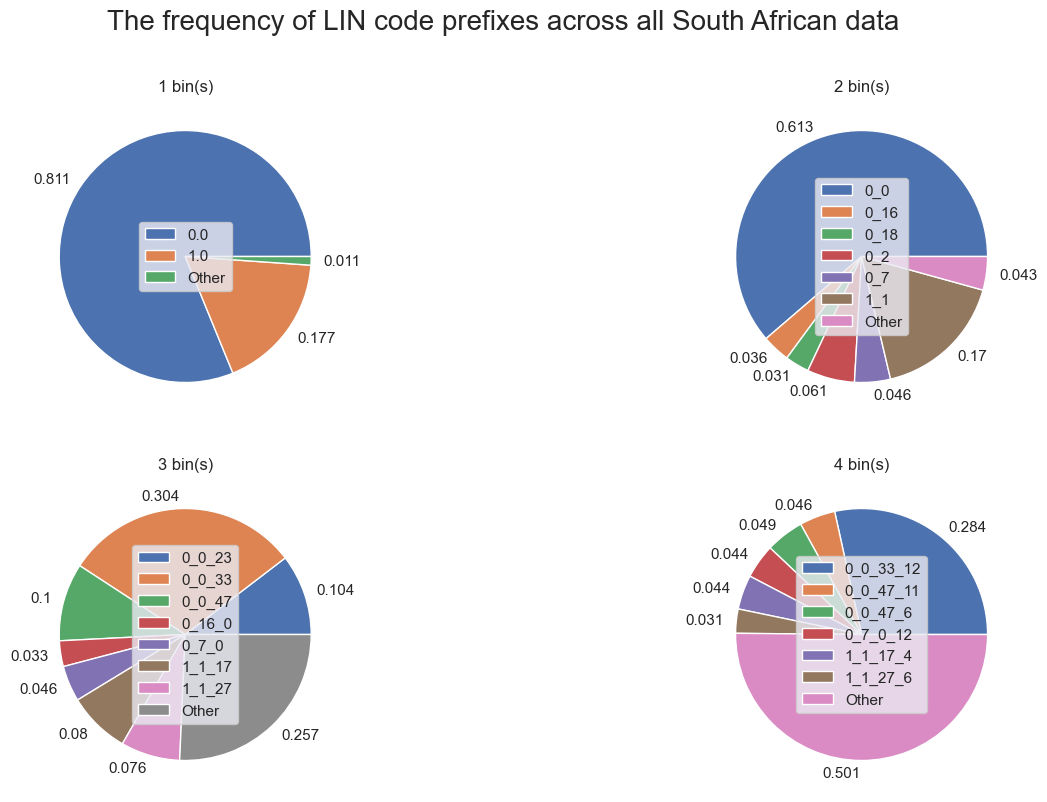

In [43]:
    # conducting the same operations for cgMLST/LIN code data for all of South Africa, including my data

    # Importing...
sa_lin: pd.DataFrame = pd.read_csv("Data/sa_cgmlst_lin.csv", sep = ",", header = "infer")
#sa_lin


    # Cleaning the dataframe...
Functions.clean(sa_lin, rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst", "LINcode (N. gonorrhoeae cgMLST v2).1": "LIN1"}, drop_col = list(range(7,17)), replace_val = {"_": np.nan, "__": np.nan, "___": np.nan})
    
    
    # Changing variable type...
sa_lin.LIN1 = sa_lin.LIN1.astype(str)
sa_lin.LIN2 = sa_lin.LIN2.astype(str)
sa_lin.LIN3 = sa_lin.LIN3.astype(str)
sa_lin.LIN4 = sa_lin.LIN4.astype(str)
#sa_lin


    # Parsing out entries with missing data...
sa_lin_missing = sa_lin[sa_lin["cgst"].isnull()]
#sa_lin_missing
    # Counting the number of entries with missing data...
sa_lin_missing_count: pd.DataFrame = sa_lin.isnull().sum()
#sa_lin_missing_count

    # Identifying entries with data...
sa_lin_clean: pd.DataFrame = sa_lin.dropna(subset = "lincode")


    # Counting the proportion of prefixes, 1 bin(s)...
sa_lin_prop1: pd.Series = Functions.LIN_prop(df = sa_lin_clean, var = "LIN1")

    # 2 bin(s)
sa_lin_prop2: pd.Series = Functions.LIN_prop(df = sa_lin_clean, var = "LIN2")
    
    # 3 bin(s)
sa_lin_prop3: pd.Series = Functions.LIN_prop(df = sa_lin_clean, var = "LIN3")

    # 4 bin(s)
sa_lin_prop4: pd.Series = Functions.LIN_prop(df = sa_lin_clean, var = "LIN4")


    # creating a figure...
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # creating a pie chart showing proportions of LIN code prefixes with 1 bin(s)
Functions.pie(data = sa_lin_prop1, title = "1 bin(s)", ax = ax[0,0])

    # ...prefixes with 2 bin(s)
Functions.pie(data = sa_lin_prop2, title = "2 bin(s)", ax = ax[0,1])

    # ...prefixes with 3 bin(s)
Functions.pie(data = sa_lin_prop3, title = "3 bin(s)", ax = ax[1,0])

    # ...prefixes with 4 bin(s)
Functions.pie(data = sa_lin_prop4, title = "4 bin(s)", ax = ax[1,1])

fig.suptitle("The frequency of LIN code prefixes across all South African data", fontsize = 20)

plt.show()

This figure represents the same type of information as the previous figure, but for isolates collected across the whole of South Africa.

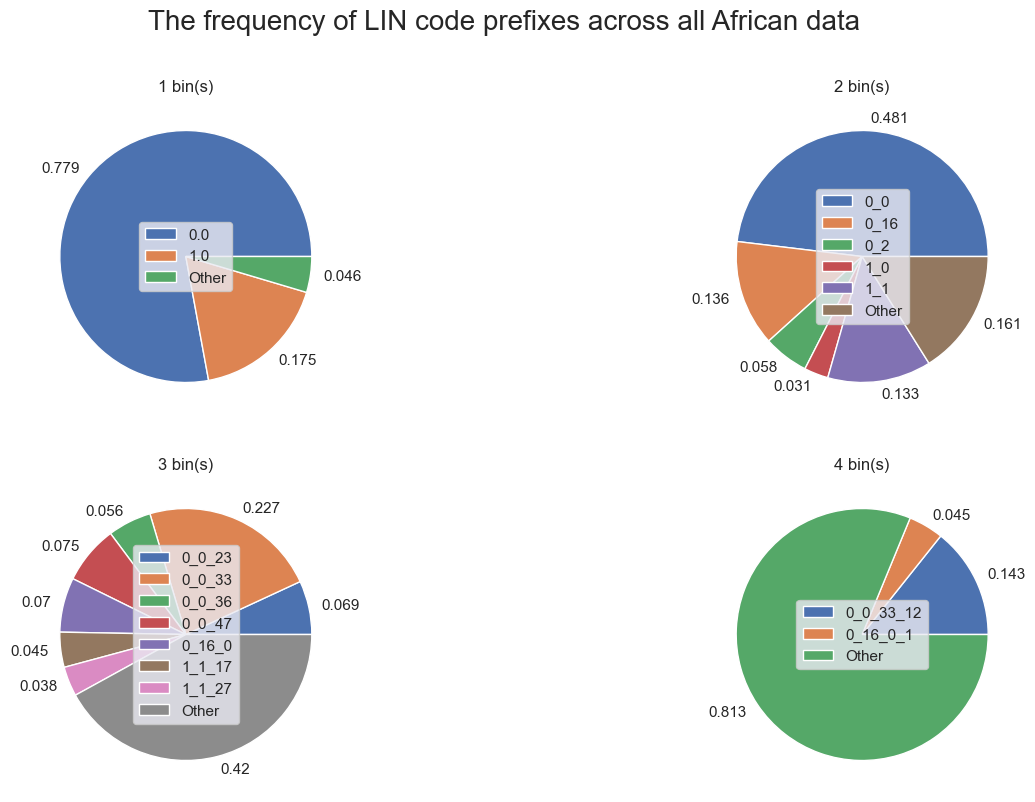

In [44]:
    # conducting the same operations for cgMLST/LIN code data for the whole of Africa, including my data

    # Importing...
afr_lin: pd.DataFrame = pd.read_csv("Data/afr_cgmlst_lin.csv", sep = ",", header = "infer")
#afr_lin


        # Cleaning the dataframe...
Functions.clean(afr_lin, rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst", "LINcode (N. gonorrhoeae cgMLST v2).1": "LIN1"}, drop_col = list(range(6,16)), replace_val = {"_": np.nan, "__": np.nan, "___": np.nan})
    
    
    # Changing variable type...
afr_lin.LIN1 = afr_lin.LIN1.astype(str)
afr_lin.LIN2 = afr_lin.LIN2.astype(str)
afr_lin.LIN3 = afr_lin.LIN3.astype(str)
afr_lin.LIN4 = afr_lin.LIN4.astype(str)
#afr_lin


    # Parsing out entries with missing data...
afr_lin_missing = afr_lin[afr_lin["cgst"].isnull()]
#afr_lin_missing
    # Counting the number of entries with missing data...
afr_lin_missing_count: pd.DataFrame = afr_lin.isnull().sum()
#afr_lin_missing_count

    # Identifying entries with data...
afr_lin_clean: pd.DataFrame = afr_lin.dropna(subset = "lincode")


    # Counting the proportion of prefixes, 1 bin(s)...
afr_lin_prop1: pd.Series = Functions.LIN_prop(df = afr_lin_clean, var = "LIN1")

    # 2 bin(s)
afr_lin_prop2: pd.Series = Functions.LIN_prop(df = afr_lin_clean, var = "LIN2")
    
    # 3 bin(s)
afr_lin_prop3: pd.Series = Functions.LIN_prop(df = afr_lin_clean, var = "LIN3")

    # 4 bin(s)
afr_lin_prop4: pd.Series = Functions.LIN_prop(df = afr_lin_clean, var = "LIN4")


    # creating a figure...
fig, ax = plt.subplots(2,2, figsize = (16,9))

    # creating a pie chart showing proportions of LIN code prefixes with 1 bin(s)
Functions.pie(data = afr_lin_prop1, title = "1 bin(s)", ax = ax[0,0])

    # ...prefixes with 2 bin(s)
Functions.pie(data = afr_lin_prop2, title = "2 bin(s)", ax = ax[0,1])

    # ...prefixes with 3 bin(s)
Functions.pie(data = afr_lin_prop3, title = "3 bin(s)", ax = ax[1,0])

    # ...prefixes with 4 bin(s)
Functions.pie(data = afr_lin_prop4, title = "4 bin(s)", ax = ax[1,1])

fig.suptitle("The frequency of LIN code prefixes across all African data", fontsize = 20)

plt.show()


This figure represents the same type of information as the previous two figures, but for isolates collected across the whole of the continent of Africa.

#### Identifying lineages that are unique to my South African dataset

In [45]:
    # identifying unique lineages in my South African dataset
my_lin3_df: pd.DataFrame = pd.DataFrame({"Lineage": my_lin_clean["LIN3"].unique()})
print(f"Unique lineages in my SA collection: {len(my_lin3_df["Lineage"])}")

    # removing my South African data from the African dataset
afr_removed: pd.DataFrame = afr_lin_clean[~afr_lin_clean["isolate"].isin(my_lin_clean["isolate"])]

    # finding unique lineages in my South African dataset
unique_lin: pd.DataFrame = my_lin_clean[~my_lin_clean["LIN3"].isin(afr_removed["LIN3"])]
print(f"Lineages unique to my SA collection: {len(unique_lin["LIN3"].unique())}")
print(f"These lineages are: {list((unique_lin["LIN3"].unique()))}")

    # exporting as CSV file
#uniq_lin.to_csv("Data_exp/my_uniq_lineage.csv")


Unique lineages in my SA collection: 54
Lineages unique to my SA collection: 31
These lineages are: ['0_12_10', '1_3_0', '1_1_50', '1_3_1', '0_2_73', '1_1_51', '1_1_49', '1_1_40', '0_2_71', '0_12_11', '0_2_30', '0_0_72', '0_0_64', '11_0_5', '0_0_73', '0_0_61', '0_2_72', '51_0_1', '0_0_92', '1_15_1', '0_18_28', '17_0_1', '0_0_63', '1_1_65', '0_2_1', '0_2_85', '0_2_86', '0_31_0', '0_18_24', '0_0_26', '1_1_52']


Here, I have filtered the African collection to remove all entries of isolates that are from my South African sample. I then used the filtered *African* dataset to remove isolates from *my SA* dataset that shares a lineage with any of the remaining African isolates. This reveals that there are **31 lineages** that are unique to my South African dataset. I also exported data of the SA isolates that are part of the 31 lineages  - "my_uniq_lineage.csv"

In [46]:
    # importing LIN code data for ALL available isolates
world_lin: pd.DataFrame = pd.read_csv("Data/world_lin.csv", sep = ",", header = "infer")


    # cleaning the dataframe...
Functions.clean(world_lin, rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "lincode", "cgST (N. gonorrhoeae cgMLST v2)": "cgst", "LINcode (N. gonorrhoeae cgMLST v2).1": "LIN1"}, drop_col = list(range(7,10)), replace_val = [{"_": np.nan, "__": np.nan, "___": np.nan}])
    
    
    # changing variable type...
world_lin.LIN1 = world_lin.LIN1.astype(str)
world_lin.LIN2 = world_lin.LIN2.astype(str)
world_lin.LIN3 = world_lin.LIN3.astype(str)
world_lin.LIN4 = world_lin.LIN4.astype(str)

print(f"Dimensions of world_lin: {world_lin.shape}")

  # removing rows with missing data
world_lin_clean: pd.DataFrame = world_lin.dropna(subset = "lincode")

print(f"Entries with LIN code data: {len(world_lin_clean.index)}")


    # filtering out all African lineages from the World dataset
world_no_afr: pd.DataFrame = world_lin_clean[~world_lin_clean["isolate"].isin(afr_lin_clean["isolate"])]
print(f"There are {len(world_no_afr.index)} isolates from outside of Africa with a LIN code")

    # 
match_lin: pd.DataFrame = world_no_afr[world_no_afr["LIN3"].isin(unique_lin["LIN3"])]
print(f"Of the LIN codes that were unique to my South African sample, {len(match_lin["LIN3"].unique())} of them are found outside of Africa.")
print(f"These LIN codes are: {match_lin["LIN3"].unique()}")
    

Dimensions of world_lin: (32879, 10)
Entries with LIN code data: 24683
There are 23225 isolates from outside of Africa with a LIN code
Of the LIN codes that were unique to my South African sample, 2 of them are found outside of Africa.
These LIN codes are: ['0_2_1' '0_0_26']


Here, I have imported LIN code data for **all available Ng isolates** on PubMLST. After comparing the lineages from Africa that are unique to my South African collection, I have found that **2** of these lineages are also found outside of Africa. This suggests that those South African isolates are more closely related to some non-African isolates than African isolates. 

In [47]:
    # creating a new DataFrame with isolates that are part of the 29 unique lineages
uniq_29_strains: pd.DataFrame = unique_lin.loc[~unique_lin["LIN3"].isin(["0_2_1", "0_0_26"])]

    # dropping unneeded columns
uniq_29_strains = uniq_29_strains.drop(uniq_29_strains.columns[[2,3,4,5,7]], axis = 1)


    # creating a new DataFrame with only lineage information
uniq_29: pd.DataFrame = pd.DataFrame(uniq_29_strains.groupby("LIN3")["isolate"].count().reset_index())
    # renaming column names
uniq_29.rename(columns = {"LIN3": "Lineage", "isolate": "Frequency"}, inplace = True)

    # exporting data
#uniq_29.to_csv("Data_exp/uniq_29.csv")


Here, I first created a DataFrame with isolates that are from one of the 29 unique (to the world) lineages. This DataFrame was used to created another with Frequency data for each lineage. This DataFrame was exported as "uniq_29.csv".

In [48]:
    # extracting the IDs of isolates that are part of the unique lineages
uniq_29_strains_id: pd.Series = uniq_29_strains["id"]
    
    # exporting their IDs
#uniq_29_strains_id.to_csv("Data_exp/Unique_Lin_id.txt", index = False)


I have also extracted the ID of isolates that make up the 29 unique lineages. They are saved in a text file "Unique_Lin_id".

In [49]:
    # extracting the MIC data for isolates that are part of the unique lineages
unique_amr: pd.DataFrame = my_amr_mic[my_amr_mic["id"].isin(uniq_29_strains["id"])]

print(f'''Azithromycin MIC mean: {np.mean(unique_amr["azi_mic"]):.3f}
Cefixime MIC mean: {np.mean(unique_amr["cef_mic"]):.3f}
Ceftriaxone MIC mean: {np.mean(unique_amr["ceftri_mic"]):.3f}
''')


Azithromycin MIC mean: 0.173
Cefixime MIC mean: 0.016
Ceftriaxone MIC mean: 0.005



#### Preparing metadata for MS trees

In [50]:
    # importing African meta data from GrapeTree
afr_meta = pd.read_csv("Data/afr_grape_meta.txt", sep='\t')


    # cleaning function
Functions.clean(df = afr_meta, drop_col = [0,4,5,6,8,9,10,11,12,13], rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "LIN", "LINcode (N. gonorrhoeae cgMLST v2)[3]": "Lineage"})

print(f"GrapeTree creates a MS tree of African isolates using {len(afr_meta.index)} isolates with assembled genomes")


   # marking each row depending on whether it's an isolate from my South African collection
afr_meta["mydata"] = afr_meta["ID"].isin(my_lin["id"]).apply(lambda x: "Y" if x else "N")

    # confirm my SA collection sample size
print(f"{afr_meta[afr_meta["mydata"] == "Y"].mydata.count()} - this is the number of genomes in my South African sample")

    # exporting
#afr_meta.to_csv("Data_exp/afr_meta.csv")


GrapeTree creates a MS tree of African isolates using 1640 isolates with assembled genomes
705 - this is the number of genomes in my South African sample


Using GrapeTree I generated an MS tree for all available African isolates. I downloaded the associated metadata and added an additional column "mydata" and marked "Y" for isolates that are part of my SA dataset and "N" for those that aren't. This DataFrame has been exported as "afr_meta.csv" for use in GrapeTree. This enables me to highlight which isolates are from my SA collection.

In [51]:
    # parsing out my SA data from all SA data
other_sa: pd.DataFrame = sa_lin[~sa_lin["id"].isin(my_lin["id"])]  

    # marking each row depending on whether it's one of my South African, other South African or other isolates
afr_meta["SA"] = afr_meta.apply(lambda x: "my_SA" if x["ID"] in my_lin["id"].values else "other_SA" if x["ID"] in other_sa["id"].values else "N", axis = 1)

    
    # checking values
print(f'''Number of "my_SA": {len(afr_meta[afr_meta["SA"] == "my_SA"])}
Number of "other_SA": {len(afr_meta[afr_meta["SA"] == "other_SA"])}
Number of "N": {len(afr_meta[afr_meta["SA"] == "N"])}
Total SA: {len(afr_meta[afr_meta["SA"] == "my_SA"]) + len(afr_meta[afr_meta["SA"] == "other_SA"])}
Total: {len(afr_meta.index)}
''')

    # exporting
#afr_meta.to_csv("Data_exp/afr_meta.csv")


Number of "my_SA": 705
Number of "other_SA": 87
Number of "N": 848
Total SA: 792
Total: 1640



I first created a DataFrame containing African isolates that *aren't* part of my South African dataset. Using this DataFrame, I then marked each (all) African isolate depending on whether it is part of my SA collection, other SA collections or from other African countries. I exported this marked DataFrame as "afr_meta.csv" for use in GrapeTree, where I will be able to see if my SA isolates are more/less related to other SA isolates than isolates from other countries in Africa.

In [52]:
    # importing World metadata from GrapeTree
world_meta = pd.read_csv("Data/world_grape_meta.txt", sep='\t')


    # cleaning function
Functions.clean(df = world_meta, drop_col = [0,4,5,6,8,9,10,11,12,13], rename_cols = {"LINcode (N. gonorrhoeae cgMLST v2)": "LIN", "LINcode (N. gonorrhoeae cgMLST v2)[3]": "Lineage"})


print(f"GrapeTree creates a MS tree of all available isolates using {len(world_meta.index)} isolates with assembled genomes")


   # marking each row depending on whether it's an isolate from my South African collection
world_meta["mydata"] = world_meta["ID"].isin(my_lin["id"]).apply(lambda x: "Y" if x else "N")

    # confirm my SA collection sample size
print(f"{world_meta[world_meta["mydata"] == "Y"].mydata.count()} - this is the number of genomes in my South African sample")

    # exporting
#world_meta.to_csv("Data_exp/world_meta.csv")


GrapeTree creates a MS tree of all available isolates using 26538 isolates with assembled genomes
705 - this is the number of genomes in my South African sample


I have imported metadata from GrapeTree for an MS tree of **all** available isolates on PubMLST. After cleaning the DataFrame, I again marked which isolates are part of my SA dataset and which are not. This marked DataFrame was exported as "world_meta.csv".

NOTE - There are 704 "Y" instead of 705. Why?

In [53]:
    # parsing out my SA data from all Africa data
other_afr: pd.DataFrame = afr_lin[~afr_lin["id"].isin(my_lin["id"])]  

    # marking each row depending on whether it's one of my South African, other African or other isolates
world_meta["africa"] = world_meta.apply(lambda x: "my_SA" if x["ID"] in my_lin["id"].values else "other_afr" if x["ID"] in other_afr["id"].values else "N", axis = 1)

    
    # checking values
print(f'''Number of "my_SA": {len(world_meta[world_meta["africa"] == "my_SA"])}
Number of "other_afr": {len(world_meta[world_meta["africa"] == "other_afr"])}
Number of "N": {len(world_meta[world_meta["africa"] == "N"])}
Total Africa: {len(world_meta[world_meta["africa"] == "my_SA"]) + len(world_meta[world_meta["africa"] == "other_afr"])}
Total: {len(world_meta.index)}
''')

    # exporting
#world_meta.to_csv("Data_exp/world_meta.csv")


Number of "my_SA": 705
Number of "other_afr": 935
Number of "N": 24898
Total Africa: 1640
Total: 26538



I identified which African isolates are not part of my South African collection, then used this DataFrame to mark each (all) African isolates according to whether they are part of my SA collection, other African collections, or from other non-African countries. This DataFrame was exported as "world_meta.csv" and will be used in GrapeTree to see if my South African isolates are more/less related to other African isolates than isolates from outside of Africa.

### NG-STAR AMR data

#### PenA

In [54]:
    # importing genotypic amr data, according to the NG-STAR scheme, for my South African sample
my_ngstar_amr: pd.DataFrame = pd.read_csv("Data/my_ngstar_amr.csv", sep = ",", header = "infer")

 
    # separating out data for PenA specifically
my_pena: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NEIS1753(PenA)"]]


    # removing rows containing NAs
my_pena = my_pena.dropna(subset = "NEIS1753(PenA)")

    # cleaning function
Functions.clean(my_pena, rename_cols = {"NEIS1753(PenA)": "pena"}, to_str = "pena")


    # counting the frequency of each PenA allele and ranking them
my_pena_count: pd.Series = Functions.allele_rank(df = my_pena, var = "pena")


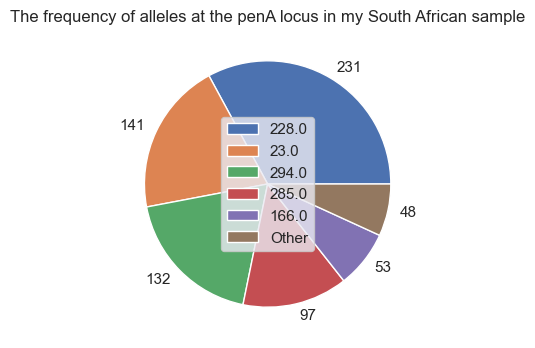

In [55]:
Functions.pie(data = my_pena_count, title = "The frequency of alleles at the penA locus in my South African sample")
plt.show()


Here, I have created a pie chart that shows the frequency of different allele ids for the PenA locus. Explicitly stated are the top 5 most frequent alleles, with all others being grouped into the "other" group.
1) allele 228: type XIX; non-mosaic; mutation(s): F504→L
2) allele 23: type II; non-mosaic; mutation(s): F504→L
3) allele 294: type XIV; non-mosaic; mutation(s): F504→L
4) allele 285: type IX; non-mosaic; mutation(s): F504→L, P551→L
5) allele 166: type II; non-mosaic; mutation(s): F504→L

While the F504L mutation is not known to be associated with resistance to any antimicrobials, there is evidence showing a statistical association between the *P551L* mutation and increased and increased MIC to ceftriaxone. 

In [56]:
    # same process but for genotypic amr data from all available South African samples...
    
    # importing
sa_ngstar_amr: pd.DataFrame = pd.read_csv("Data/sa_ngstar_amr.csv", sep=",", header="infer")

    
    # separating out PenA...
sa_pena: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "NEIS1753(PenA)"]]

    # removing rows containing NAs...
sa_pena = sa_pena.dropna(subset = "NEIS1753(PenA)")

    # cleaning function
Functions.clean(sa_pena, rename_cols = {"NEIS1753(PenA)": "pena"}, to_str = "pena")


    # ranking allele frequencies...
sa_pena_count: pd.Series = Functions.allele_rank(sa_pena, var = "pena")


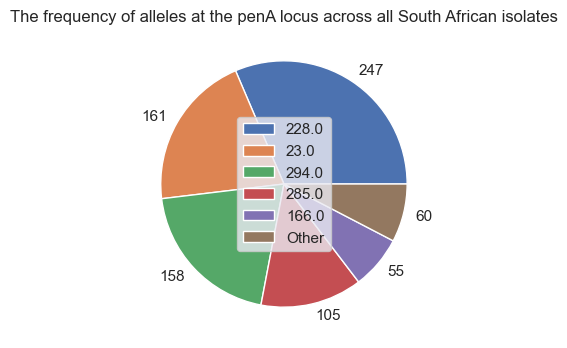

In [57]:
Functions.pie(data = sa_pena_count, title = "The frequency of alleles at the penA locus across all South African isolates")
plt.show()


This figure shows the same type of information as the previous figure, but across all South African isolates available:
1) allele 228: type XIX; non-mosaic; mutation(s): F504→L
2) allele 23: type II; non-mosaic; mutation(s): F504→L
3) allele 294: type XIV; non-mosaic; mutation(s): F504→L
4) allele 285: type IX; non-mosaic; mutation(s): F504→L, P551→L
5) allele 166: type II; non-mosaic; mutation(s): F504→L

These allele IDs are the same/in the same order as in my South African sample. While the F504L mutation is not known to be associated with resistance to any antimicrobials, there is evidence showing a statistical association between the *P551L* mutation and increased and increased MIC to ceftriaxone. 

In [58]:
    # same process but for genotypic amr data from across the whole of Africa...
    
    # importing
afr_ngstar_amr: pd.DataFrame = pd.read_csv("Data/afr_ngstar_amr.csv", sep=",", header="infer")

    
    # separating out PenA...
afr_pena: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "NEIS1753(PenA)"]]

    # removing rows containing NAs...
afr_pena = afr_pena.dropna(subset = "NEIS1753(PenA)")
    
    
    # cleaning function
Functions.clean(df = afr_pena, rename_cols = {"NEIS1753(PenA)": "pena"}, to_str = "pena")

    # ranking allele frequencies...
afr_pena_count: pd.Series = Functions.allele_rank(df = afr_pena, var = "pena")


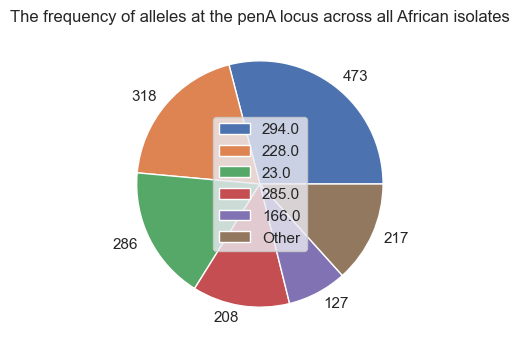

In [59]:
Functions.pie(data = afr_pena_count, title = "The frequency of alleles at the penA locus across all African isolates")
plt.show()


This figure shows the same type of information as the previous two figures, but across the continent of Africa:
1) allele 228: type XIX; non-mosaic; mutation(s): F504→L
2) allele 294: type XIV; non-mosaic; mutation(s): F504→L
3) allele 23: type II; non-mosaic; mutation(s): F504→L
4) allele 285: type IX; non-mosaic; mutation(s): F504→L, P551→L
5) allele 166: type II; non-mosaic; mutation(s): F504→L

These alleles are the same as in my South African sample/the whole of South Africa dataset. The only difference is that the Rank 2 & 3 alleles in this dataset are swapped around in the former two datasets.

While the F504L mutation is not known to be associated with resistance to any antimicrobials, there is evidence showing a statistical association between the *P551L* mutation and increased and increased MIC to ceftriaxone. 

#### 23S RNA

In [60]:
    # separating out 23S...
my_23s: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NG_23S"]]

    # removing rows containing NAs...
my_23s = my_23s.dropna(subset = "NG_23S")
    
    # cleaning function
Functions.clean(df = my_23s, rename_cols = {"NG_23S": "ng_23s"}, to_str = "ng_23s")


    # ranking allele frequencies...
my_23s_count = Functions.allele_rank(df = my_23s, var = "ng_23s")


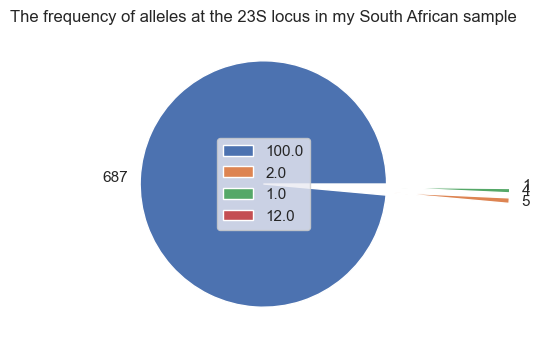

In [61]:
Functions.pie(data = my_23s_count, title = "The frequency of alleles at the 23S locus in my South African sample", exp = [0, 1, 1, 1])
plt.show()


This pie chart shows the frequency of alleles at the 23S locus (under the NG-STAR typing scheme) in my South African sample. Because there were only 4 alleles at this locus, there is no "other" segment:
1) allele 100: Wild Type
2) allele 2: Mutation(s): C2611T; Azithromycin MIC:4 Erythromycin MIC: 32
3) allele 1: Mutation(s): A2059G; Azithromycin MIC:>=512; Erythromycin MIC:>=64	
4) allele 12: Wild Type

The A2059G mutation is known to be associated with high-level resistance to erithromycin & azithromycin (macrolides). The C2611T mutations is known to be associated with low-level resistance to erithromycin & azithromycin.

Resistance to macrolides depends on the number of these resistance mutations present across an organism's **4 alleles**.


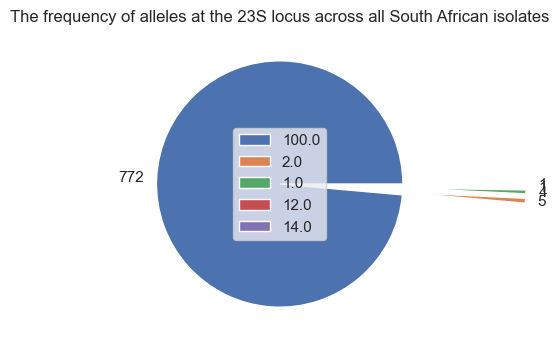

In [62]:
    # same process but for genotypic amr data from all of South Africa...

# separating out 23S RNA...
sa_23s: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "NG_23S"]]

    # removing rows containing NAs...
sa_23s = sa_23s.dropna(subset = "NG_23S")
    
    # cleaning function
Functions.clean(df = sa_23s, rename_cols = {"NG_23S": "ng_23s"}, to_str = "ng_23s")


    # ranking allele frequencies...
sa_23s_count = Functions.allele_rank(df = sa_23s, var = "ng_23s")


Functions.pie(data = sa_23s_count, title = "The frequency of alleles at the 23S locus across all South African isolates", exp = [0, 1, 1, 1, 1])
plt.show()


This figure shows the same type of information as the previous figure, but for all available South African isolates. Because there were only 5 alleles at this locus, there is no "other" segment:
1) allele 100: Wild Type
2) allele 2: Mutation(s): C2611T; Azithromycin MIC:4 Erythromycin MIC: 32
3) allele 1: Mutation(s): A2059G; Azithromycin MIC:>=512; Erythromycin MIC:>=64	
4) allele 12: Wild Type
5) allele **14**: Wild Type 

Alleles ranked 1-4 are the same as in my South African sample. In this sample, there is also **allele 14**. 

The A2059G mutation is known to be associated with high-level resistance to erithromycin & azithromycin (macrolides). The C2611T mutations is known to be associated with low-level resistance to erithromycin & azithromycin.

Resistance to macrolides depends on the number of these resistance mutations present across an organism's **4 alleles**.


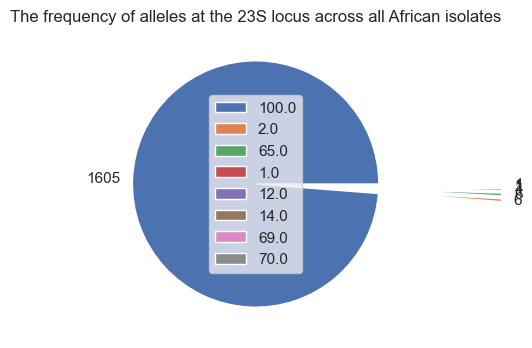

In [63]:
    # same process but for genotypic amr data from all of Africa...

    # separating out 23S RNA...
afr_23s: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "NG_23S"]]

    # removing rows containing NAs...
afr_23s = afr_23s.dropna(subset = "NG_23S")
    
    # cleaning function
Functions.clean(df = afr_23s, rename_cols = {"NG_23S": "ng_23s"}, to_str = "ng_23s")


    # ranking allele frequencies...
afr_23s_count = Functions.allele_rank(df = afr_23s, var = "ng_23s", max_value = 8)


Functions.pie(data = afr_23s_count, title = "The frequency of alleles at the 23S locus across all African isolates", exp = [0, 1, 1, 1, 1, 1, 1, 1])
plt.show()


This figure shows the same type of information as the previous two figures, but for all available African isolates. Because four alleles have a frequency of "1" and two alleles have a frequency of "6", I have not grouped low-frequency alleles together.
1) allele 100: Wild Type
2) allele 2: Mutation(s): C2611T; Azithromycin MIC:4 Erythromycin MIC: 32
3) allele **65**: Wild Type
4) allele 1: Mutation(s): A2059G; Azithromycin MIC:>=512; Erythromycin MIC:>=64	
5) allele 12: Wild Type
6) allele 14: Wild Type 
7) allele **69**: Wild Type
8) allele **70**: Mutation(s): C2611T

There are a few alleles found in this sample that aren't found in South African samples (65, 69, 70). 

The A2059G mutation is known to be associated with high-level resistance to erithromycin & azithromycin (macrolides). The C2611T mutations is known to be associated with low-level resistance to erithromycin & azithromycin.

Resistance to macrolides depends on the number of these resistance mutations present across an organism's **4 alleles**.


#### mtrR

In [64]:
my_ngstar_amr.head()
  
    # separating out mtrR...
my_mtrr: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "'mtrR"]]

    # removing rows containing NAs in mtrR...
my_mtrr = my_mtrr.dropna(subset = ["'mtrR"])
    # simplifying column name(s)...

    # cleaning function
Functions.clean(df = my_mtrr, rename_cols = {"'mtrR": "mtrR"}, to_str = "mtrR")

    # ranking allele frequencies...
my_mtrr_count: pd.Series = Functions.allele_rank(df = my_mtrr, var = "mtrR")


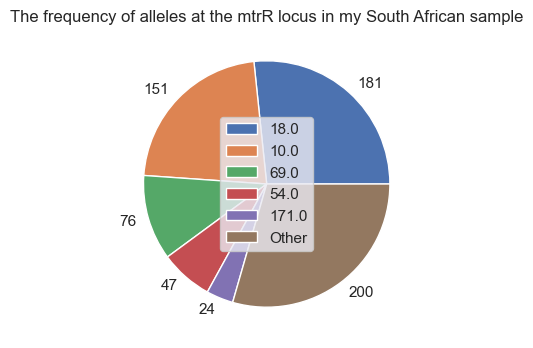

In [65]:
Functions.pie(data = my_mtrr_count, title = "The frequency of alleles at the mtrR locus in my South African sample")
plt.show()


Here, I have created a pie chart that shows the frequency of different allele ids for the 'mtrR locus. Explicitly stated are the top 5 most frequent alleles, with all others being grouped into the "other" group.
1) allele 18; Wild Type
2) allele 10; mutations: A39T
3) allele 69; Wild Type
4) allele 54; mutations: A39T
5) allele 171; Wild Type

The A39T mutation is not known to be associated with resistance to any antimicrobials.

In [66]:
    # same process but for genotypic amr data from all of South Africa...
  
    # separating out mtrR...
sa_mtrr: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "'mtrR"]]

    # removing rows containing NAs in mtrR...
sa_mtrr = sa_mtrr.dropna(subset = ["'mtrR"])
    
    # cleaning function
Functions.clean(df = sa_mtrr, rename_cols = {"'mtrR": "mtrR"}, to_str = "mtrR")
    

    # ranking allele frequencies...
sa_mtrr_count: pd.Series = Functions.allele_rank(df = sa_mtrr, var = "mtrR")


<Axes: title={'center': 'The frequency of alleles at the mtrR locus across all South African isolates'}>

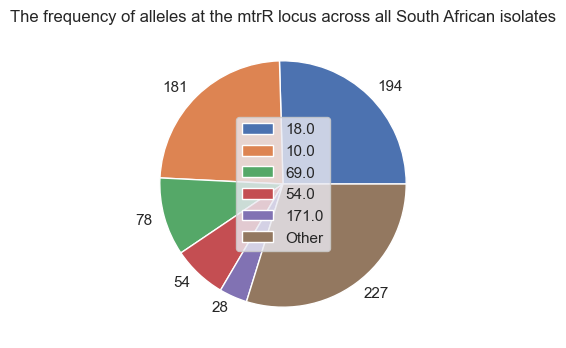

In [67]:
Functions.pie(data = sa_mtrr_count, title = "The frequency of alleles at the mtrR locus across all South African isolates")

This figure shows the same type of information as the previous, but across all available South African isolates:
1) allele 18; Wild Type
2) allele 10; mutations: A39T
3) allele 69; Wild Type
4) allele 54; mutations: A39T
5) allele 171; Wild Type

These allele IDs are the same as in my South African sample. The A39T mutation is not not to be associated with resistance to any antimicrobials.

In [68]:
    # same process but for genotypic amr data from all aross Africa...

   # separating out mtrR...
afr_mtrr: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "'mtrR"]]

    # removing rows containing NAs in mtrR...
afr_mtrr = afr_mtrr.dropna(subset = ["'mtrR"])

    # cleaning function
Functions.clean(df = afr_mtrr, rename_cols = {"'mtrR": "mtrR"}, to_str = "mtrR")

    # ranking allele frequencies...
afr_mtrr_count: pd.Series = Functions.allele_rank(df = afr_mtrr, var = "mtrR")


<Axes: title={'center': 'The frequency of alleles at the mtrR locus across all African isolates'}>

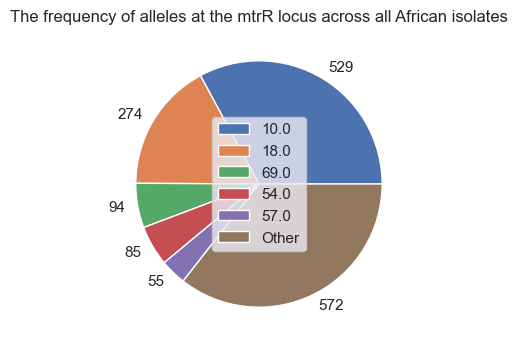

In [69]:
Functions.pie(data = afr_mtrr_count, title = "The frequency of alleles at the mtrR locus across all African isolates")

This figure shows the same type of information as the previous two, but for all available African isolates:
1) allele 10; mutations: A39T
2) allele 18; Wild Type
3) allele 69; Wild Type
4) allele 54; mutations: A39T
5) allele 57: Wild Type

Alleles ranked 1-4 are present in both of the previous two collections analysed (albeit in different order) but the rank 5 allele *57* is not. The A39T mutation is not not to be associated with resistance to any antimicrobials.

#### PorB

In [70]:
my_ngstar_amr.head()
  
    # separating out porB...
my_porb: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NG_porB"]]

    # removing rows containing NAs in mtrR...
my_porb = my_porb.dropna(subset = ["NG_porB"])

    # simplifying column name(s)...
Functions.clean(df = my_porb, rename_cols = {"NG_porB": "porB"}, to_str = "porB")

    # ranking allele frequencies...
my_porb_count: pd.Series = Functions.allele_rank(df = my_porb, var = "porB")


<Axes: title={'center': 'The frequency of alleles at the porB locus in my South African sample'}>

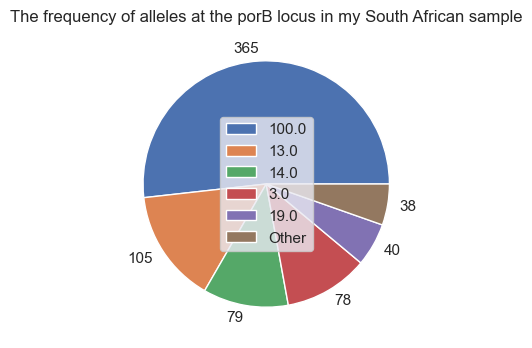

In [71]:
Functions.pie(data = my_porb_count, title = "The frequency of alleles at the porB locus in my South African sample")


This figure shows the frequency of alleles at the porB locus (under the NG-STAR scheme) in my South African sample. Explicitly shown are the 5 most frequent alleles, with the other low-frequency alleles being grouped together:
1) allele 100; Wild Type
2) allele 13; porB1a (P1A)
3) allele 14; porB1a (P1A)
4) allele 3; Mutations: A121S 
5) allele 19; porB1a (P1A)

None of these variants/mutations are associated with antimicrobial resistance.

In [72]:
sa_ngstar_amr.head()
  
    # separating out porB...
sa_porb: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "NG_porB"]]

    # removing rows containing NAs in mtrR...
sa_porb = sa_porb.dropna(subset = ["NG_porB"])
    
    # cleaning function
Functions.clean(df = sa_porb, rename_cols = {"NG_porB": "porB"}, to_str = "porB")

    # ranking allele frequencies...
sa_porb_count: pd.Series = Functions.allele_rank(df = sa_porb, var = "porB")


<Axes: title={'center': 'The frequency of alleles at the porB locus across all South African isolates'}>

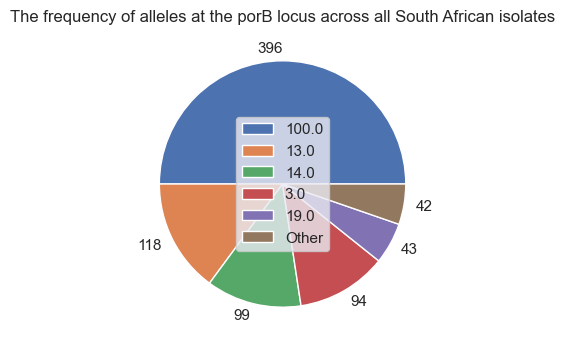

In [73]:
Functions.pie(data = sa_porb_count, title = "The frequency of alleles at the porB locus across all South African isolates")


This figure shows same type of information as the previous graph, but for all available South African isolates:
1) allele 100; Wild Type
2) allele 13; porB1a (P1A)
3) allele 14; porB1a (P1A)
4) allele 3; Mutations: A121S 
5) allele 19; porB1a (P1A)

This is the same ranking as in my South African sample. None of these variants/mutations are associated with antimicrobial resistance.

In [74]:
afr_ngstar_amr.head()
  
    # separating out porB...
afr_porb: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "NG_porB"]]

    # removing rows containing NAs in mtrR...
afr_porb = afr_porb.dropna(subset = ["NG_porB"])
    
    # cleaning function
Functions.clean(df = afr_porb, rename_cols = {"NG_porB": "porB"}, to_str = "porB")

    # ranking allele frequencies...
afr_porb_count: pd.Series = Functions.allele_rank(df = afr_porb, var = "porB")


<Axes: title={'center': 'The frequency of alleles at the porB locus across all African isolates'}>

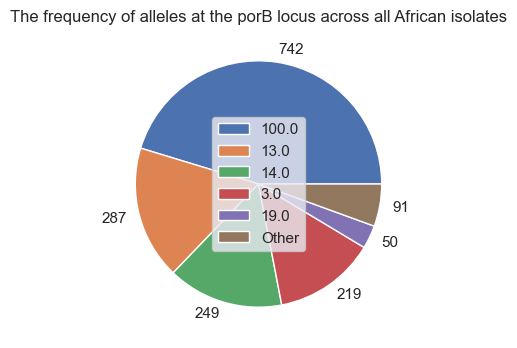

In [75]:
Functions.pie(data = afr_porb_count, title = "The frequency of alleles at the porB locus across all African isolates")


This figure shows the same type of information as the previous two, but for all available African isolates:
1) allele 100; Wild Type
2) allele 13; porB1a (P1A)
3) allele 14; porB1a (P1A)
4) allele 3; Mutations: A121S 
5) allele 19; porB1a (P1A)

This is the same ranking as in my South African sample. None of these variants/mutations are associated with antimicrobial resistance.

#### GyrA

In [76]:
my_ngstar_amr.head()
  
    # separating out gyrA...
my_gyra: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NG_gyrA"]]

    # removing rows containing NAs in mtrR...
my_gyra = my_gyra.dropna(subset = ["NG_gyrA"])

    # cleaning column name(s)...
Functions.clean(df = my_gyra, rename_cols = {"NG_gyrA": "gyrA"}, to_str = "gyrA")

    # ranking allele frequencies...
my_gyra_count: pd.Series = Functions.allele_rank(df = my_gyra, var = "gyrA")


<Axes: title={'center': 'The frequency of alleles at the gyrA locus my South African sample'}>

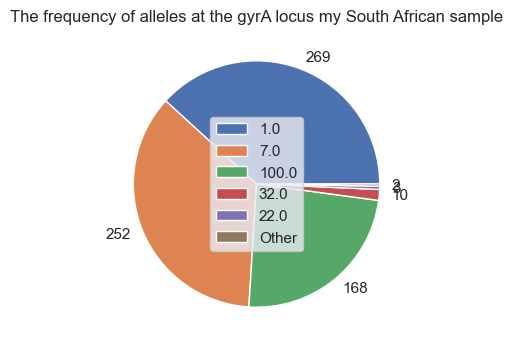

In [77]:
Functions.pie(data = my_gyra_count, title = "The frequency of alleles at the gyrA locus my South African sample")


This figure shows the frequency of alleles at the gyrA locus (under the NG-STAR typing scheme) for my South African sample. Explicitly shown are the 5 most frequency alleles, with other low-frequency alleles being grouped together:
1) allele 1; Mutation(s): S91F, D95G; Ciprofloxacin MIC: 2	
2) allele 7; Mutation(s) S91F, D95A; Ciprofloxacin MIC: 4	
3) allele 100; Wild Type
4) allele 32; Mutations(s): S91F, D95G
5) allele 22; Mutation(s): D95G	

The mutations S91F and D95G are known to be associated with resistance to Quinolones.

In [78]:
sa_ngstar_amr.head()
  
    # separating out gyrA...
sa_gyra: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "NG_gyrA"]]

    # removing rows containing NAs in mtrR...
sa_gyra = sa_gyra.dropna(subset = ["NG_gyrA"])

    # cleaning function
Functions.clean(df = sa_gyra, rename_cols = {"NG_gyrA": "gyrA"}, to_str = "gyrA")

    # ranking allele frequencies...
sa_gyra_count: pd.Series = Functions.allele_rank(df = sa_gyra, var = "gyrA")


<Axes: title={'center': 'The frequency of alleles at the gyrA locus across all South African isolates'}>

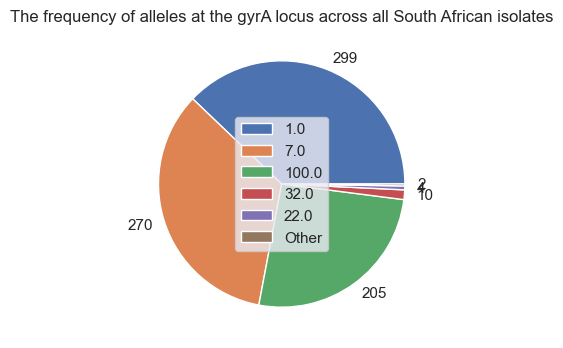

In [79]:
Functions.pie(data = sa_gyra_count, title = "The frequency of alleles at the gyrA locus across all South African isolates")


This figure shows the same type of information as the previous, but for all available South African isolates:
1) allele 1; Mutation(s): S91F, D95G; Ciprofloxacin MIC: 2	
2) allele 7; Mutation(s) S91F, D95A; Ciprofloxacin MIC: 4	
3) allele 100; Wild Type
4) allele 32; Mutations(s): S91F, D95G
5) allele 22; Mutation(s): D95G	

This order is the same as the ranking in my South African sample. The mutations S91F and D95G are known to be associated with resistance to Quinolones.

In [80]:
afr_ngstar_amr.head()
  
    # separating out gyrA...
afr_gyra: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "NG_gyrA"]]

    # removing rows containing NAs in mtrR...
afr_gyra = afr_gyra.dropna(subset = ["NG_gyrA"])

    # cleaning function
Functions.clean(df = afr_gyra, rename_cols = {"NG_gyrA": "gyrA"}, to_str = "gyrA")

    # ranking allele frequencies...
afr_gyra_count: pd.Series = Functions.allele_rank(df = afr_gyra, var = "gyrA")


<Axes: title={'center': 'The frequency of alleles at the gyrA locus across all African isolates'}>

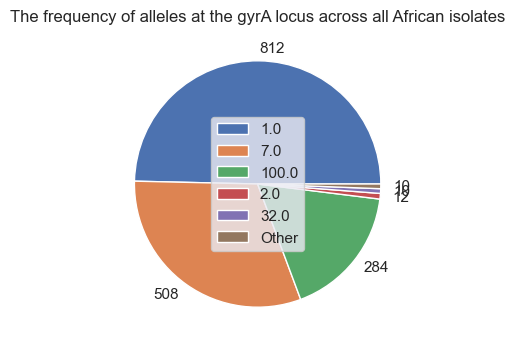

In [81]:
Functions.pie(data = afr_gyra_count, title = "The frequency of alleles at the gyrA locus across all African isolates")


This figure shows the same type of information as the previous, but for all available South African isolates:
1) allele 1; Mutation(s): S91F, D95G; Ciprofloxacin MIC: 2	
2) allele 7; Mutation(s) S91F, D95A; Ciprofloxacin MIC: 4	
3) allele 100; Wild Type
4) allele 2: Mutation(s): S91F, **D95N**; Ciprofloxacin: >32		
5) allele 32; Mutations(s): S91F, D95G

Alleles ranked 1-3 by frequency are also found in this order in my South African sample. The Rank 4 allele is a frequency allele in my South African sample, and allele 32 is instead ranked at 5 across all African isolates, instead of 4 as in my South African sample.

The mutations S91F, D95G and D95N are known to be associated with resistance to Quinolones. 

#### ponA

In [82]:

my_ngstar_amr.head()

    # separating out ponA...
my_pona: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NG_ponA"]]

    # removing rows containing NAs...
my_pona = my_pona.dropna(subset = ["NG_ponA"])
    
    # cleaning function
Functions.clean(df = my_pona, rename_cols = {"NG_ponA": "ponA"}, to_str = "ponA")


    # ranking allele frequencies...
my_pona_count: pd.Series = my_pona.groupby("ponA").ponA.count()


<Axes: title={'center': 'The frequency of alleles at the ponA locus in my South African sample'}>

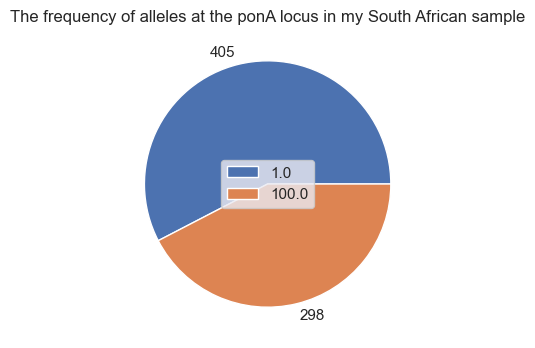

In [83]:
Functions.pie(data = my_pona_count, title = "The frequency of alleles at the ponA locus in my South African sample")


This figure shows the frequency of alleles at the ponA locus in my South African sample. There are only two alleles present:
1) allele 1: Mutation(s): L421P
2) allele 100: Wild Type

Alleles with the L421P mutation are described as the "ponA1 determinant", is associated with resistance to Penicillins.

In [84]:
    # same procedure but for all available South African isolates...
    
sa_ngstar_amr.head()

    # separating out ponA...
sa_pona: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "NG_ponA"]]

    # removing rows containing NAs...
sa_pona = sa_pona.dropna(subset = ["NG_ponA"])
    
    # cleaning function
Functions.clean(df = sa_pona, rename_cols = {"NG_ponA": "ponA"}, to_str = "ponA")


    # ranking allele frequencies...
sa_pona_count: pd.Series = sa_pona.groupby("ponA").ponA.count()


<Axes: title={'center': 'The frequency of alleles at the ponA locus across all South African isolates'}>

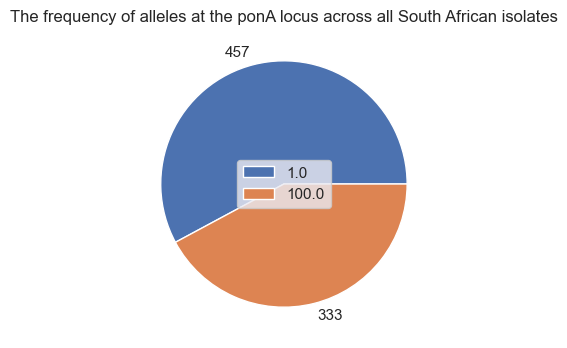

In [85]:
Functions.pie(data = sa_pona_count, title = "The frequency of alleles at the ponA locus across all South African isolates")


This figure shows the same type of information as the previous figure, but for all available South African isolates. There are only two alleles present:
1) allele 1: Mutation(s): L421P
2) allele 100: Wild Type

Alleles with the L421P mutation are described as the "ponA1 determinant", is associated with resistance to Penicillins.

In [86]:
    # same procedure but for all available African isolates...
    
afr_ngstar_amr.head()

    # separating out ponA...
afr_pona: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "NG_ponA"]]

    # removing rows containing NAs...
afr_pona = afr_pona.dropna(subset = ["NG_ponA"])
    
    # cleaning function
Functions.clean(df = afr_pona, rename_cols = {"NG_ponA": "ponA"}, to_str = "ponA")


    # ranking allele frequencies...
afr_pona_count: pd.Series = afr_pona.groupby("ponA").ponA.count()


<Axes: title={'center': 'The frequency of alleles at the ponA locus across all African isolates'}>

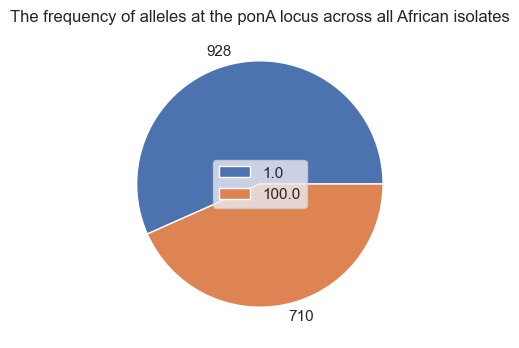

In [87]:
Functions.pie(data = afr_pona_count, title = "The frequency of alleles at the ponA locus across all African isolates")


This figure shows the same type of information as the previous two figures, but for all available African isolates. There are only two alleles present:
1) allele 1: Mutation(s): L421P
2) allele 100: Wild Type

Alleles with the L421P mutation are described as the "ponA1 determinant", is associated with resistance to Penicillins.

#### parC

In [88]:

my_ngstar_amr.head()

    # separating out parC...
my_parc: pd.DataFrame =  my_ngstar_amr[["id", "isolate", "region", "year", "NG_parC"]]

    # removing rows containing NAs...
my_parc = my_parc.dropna(subset = ["NG_parC"])
    
    # cleaning function
Functions.clean(df = my_parc, rename_cols = {"NG_parC": "parC"}, to_str = "parC")


    # ranking allele frequencies...
my_parc_count: pd.Series = Functions.allele_rank(df = my_parc, var = "parC")


<Axes: title={'center': 'The frequency of alleles at the parC locus in my South African sample'}>

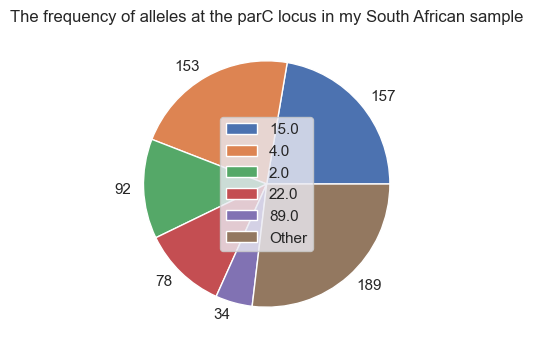

In [89]:
Functions.pie(data = my_parc_count, title = "The frequency of alleles at the parC locus in my South African sample")


This figure shows the frequency of alleles at the parC locus in my South African sample. Explicitly shown are the top 5 most frequent alleles, with other low-frequency alleles being grouped together:
1) allele 15: Mutation(s): S87N
2) allele 4: Mutations(s): D86N
3) allele 2: Wild Type
4) allele 22: Wild Type
5) allele 89: Wild Type

The S87N mutation is not known to be associated with antimicrobial resistance, however the D86N mutation is known to be associated with high-level ciprofloxacin resistance.

In [90]:
    # same procedures, but for all available South African isolates

sa_ngstar_amr.head()

    # separating out parC...
sa_parc: pd.DataFrame =  sa_ngstar_amr[["id", "isolate", "region", "year", "NG_parC"]]

    # removing rows containing NAs...
sa_parc = sa_parc.dropna(subset = ["NG_parC"])
    
    # cleaning function
Functions.clean(df = sa_parc, rename_cols = {"NG_parC": "parC"}, to_str = "parC")


    # ranking allele frequencies...
sa_parc_count: pd.Series = Functions.allele_rank(df = sa_parc, var = "parC")


<Axes: title={'center': 'The frequency of alleles at the parC locus across all South African isolates'}>

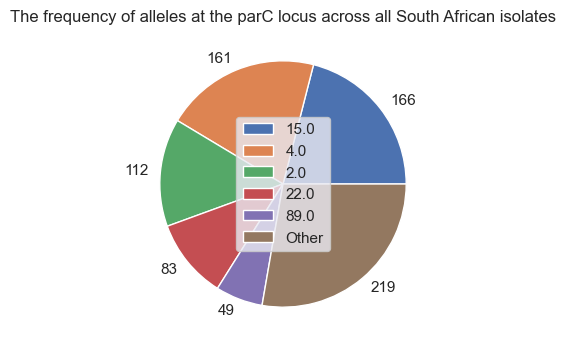

In [91]:
Functions.pie(data = sa_parc_count, title = "The frequency of alleles at the parC locus across all South African isolates")


This figure shows the same type of information as the previous figure, but for all available South African isolates:
1) allele 15: Mutation(s): S87N
2) allele 4: Mutations(s): D86N
3) allele 2: Wild Type
4) allele 22: Wild Type
5) allele 89: Wild Type

This is the same ranking as in my South African sample. The S87N mutation is not known to be associated with antimicrobial resistance, however the D86N mutation is known to be associated with high-level ciprofloxacin resistance.

In [92]:
    # same procedures, but for all available African isolates

afr_ngstar_amr.head()

    # separating out parC...
afr_parc: pd.DataFrame =  afr_ngstar_amr[["id", "isolate", "country", "year", "NG_parC"]]

    # removing rows containing NAs...
afr_parc = afr_parc.dropna(subset = ["NG_parC"])
    
    # cleaning function
Functions.clean(df = afr_parc, rename_cols = {"NG_parC": "parC"}, to_str = "parC")


    # ranking allele frequencies...
afr_parc_count: pd.Series = Functions.allele_rank(df = afr_parc, var = "parC")


<Axes: title={'center': 'The frequency of alleles at the parC locus across all African isolates'}>

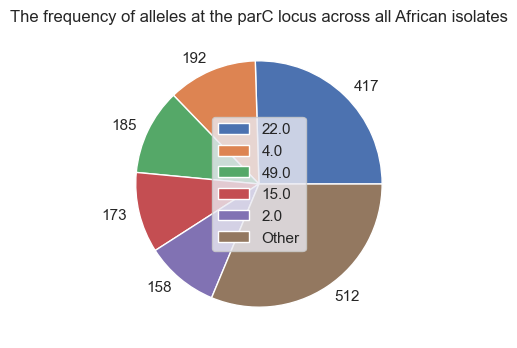

In [93]:
Functions.pie(data = afr_parc_count, title = "The frequency of alleles at the parC locus across all African isolates")


This figure shows the same type of information as the previous two figures, but for all available African isolates:
1) allele 22: Wild Type
2) allele 4: Mutations(s): D86N
3) allele **49**: Wild Type 
4) allele 15: Mutation(s): S87N
5) allele 2: Wild Type

Four of the 5 most frequent alleles in the my South African sample & all South African collection are present in this collection of isolates (22, 4, 15 & 2). However, allele 89 is no longer in the top 5 most frequent alleles. There is now allele 49.

The S87N mutation is not known to be associated with antimicrobial resistance, however the D86N mutation is known to be associated with high-level ciprofloxacin resistance.

### Genotypic & Phenotypic AMR links

#### Investigating Azithromycin Resistance


In [94]:
    # extracting the resistant strains' NG-STAR data
my_azi_res_geno: pd.DataFrame = my_ngstar_amr.loc[my_ngstar_amr.index.isin(list(my_azi_res.index))].copy()

    # dropping unneeded columns
my_azi_res_geno.drop(my_azi_res_geno.columns[[11,12]], axis = 1, inplace = True)
my_azi_res_geno


,id,isolate,region,year,'mtrR,NEIS1753(PenA),NG_23S,NG_gyrA,NG_parC,NG_ponA,NG_porB
314,140585,21MUS_AH021_S113,Gauteng Province,2021,25.0,166.0,1.0,1.0,4.0,100.0,100.0
316,140587,21MUS_AH105_S87,Gauteng Province,2021,568.0,294.0,2.0,1.0,4.0,100.0,13.0
320,140591,21MUS_AH125_S89,Gauteng Province,2021,25.0,166.0,1.0,1.0,4.0,100.0,100.0
329,140600,22MUS_AH054_S93,Gauteng Province,2022,568.0,294.0,2.0,1.0,4.0,100.0,13.0
339,140618,21MUS_AH165,Gauteng Province,2021,568.0,294.0,2.0,1.0,4.0,100.0,13.0


23S RNA:
- 140585: allele 1; A2059G; Azithromycin MIC:>=512; Erythromycin MIC:>=64
- 140587: allele 2; C2611T; Azithromycin MIC:4 Erythromycin MIC: 32
- 140591: allele 1 -
- 140600: allele 2 -
- 140618: allele 2 -


mtrR:

Mutations result in overexpression of MtrCDE efflux pump, thus increased efflux from it. This would mean increased efflux of macrolides.

- 140585: allele 25; G45D;
- 140587: allele 568; A39T
- 140591: allele 25 -
- 140600: allele 568 -
- 140618: allele 568 -

mtrC:

There are *rare* mutations in the mtrC gene that can lead to high-level resistance by increase in macrolide efflux.

- 140585: allele 12; 
- 140587: allele 12
- 140591: allele 12
- 140600: allele 12
- 140618: allele 12

ermB:

erm genes are RNA methylases that can block macrolide binding to 23S rRNA by methylating a residue. This can lead to high-level resistance to erithromycin and low-level resistance to aazithromycin.

- 140585: allele 7; 
- 140587: allele 5;
- 140591: allele 7 -
- 140600: allele 5 -
- 140618: allele 5 -

MacAB efflux pump (MacA):
- The MacAB efflux pump can export macrolides.
- Something about macA and macB genes? they are organised as an operon and mutations in it affects MacAB expression? A G > T


- 140585: allele 469;
- 140587: allele 477;
- 140591: allele 469 -
- 140600: allele 477 -
- 140618: allele 477 -

(MacB):
- 140585: allele 345; 
- 140587: allele 583; 
- 140591: allele 345 -
- 140600: allele 583 -
- 140618: allele 583 -


mef-encoded efflux pump:

The mef-encoded efflux pump protein recognises macrolides

- 140585: 
- 140587:
- 140591:
- 140600:
- 140618: 


mtrR sequence data on PubMLST is stored in three ways:
1) 'mtrR - Coding region + Promoter region
2) NEIS1635 - Coding regin
3) pro_NEIS1635 - Promoter region

Some isolates have available sequence data for one but not another - e.g., has 'mtrR data but not NEIS1635. I need to identify for which isolates this is the case and try to combine these sequence data so that I have as much mtrR data as possible for each isolate.

#### Searching for missing mtrR data

In [95]:
    # importing all pubMLST data
mtrR_724: pd.DataFrame = pd.read_csv("Data/724_all_mtrR.csv", sep = ",", header = "infer")
    # filtering for rows with any missing data
mtrR_724_na: pd.DataFrame = mtrR_724[mtrR_724.isna().any(axis = 1)]

print(f"{len(mtrR_724_na[mtrR_724_na[["'mtrR", "NEIS1635", "pro_NEIS1635"]].isna().all(axis = 1)])} isolate(s) have no data at all. These isolate(s) are {list(mtrR_724_na[mtrR_724_na[["'mtrR", "NEIS1635", "pro_NEIS1635"]].isna().all(axis = 1)]["id"])}")

mtrR_724.loc[mtrR_724["id"] == 131126]

1 isolate(s) have no data at all. These isolate(s) are [131171]


,id,isolate,'mtrR,NEIS1635,pro_NEIS1635
45,131126,GP-12-MUS-242,NaN,NaN,6.0


I have imported the allele ID data for all 706 SA isolates + 18 WHO reference isolates. I have filtered the dataframe for isolates missing data in all of the three loci. I have checked pubMLST to confirm the absence of data for isolate 131171.

In [96]:
    # filtering for rows with missing 'mtrR data
whole_mtrR_na: pd.DataFrame = mtrR_724_na[mtrR_724_na["'mtrR"].isna()]

    # filtering for rows with missing mtrR coding sequence data
NEIS1635_na: pd.DataFrame = mtrR_724_na[mtrR_724_na["NEIS1635"].isna()]

    # filtering for rows with missing mtrR promoter sequence data
pro_NEIS1635_na: pd.DataFrame = mtrR_724_na[mtrR_724_na["pro_NEIS1635"].isna()]


I have filtered the data for isolates missing data in each of the three loci.

##### Coding Sequence - 'mtrR & NEIS1635

In [97]:
print(f"{len(whole_mtrR_na)} isolate(s) have no 'mtrR data.")
print(f"{len(NEIS1635_na)} isolate(s) have no NEIS1635 data.")
    
    # identifying isolates with no 'mtrR data but has CDS data
print(f"{len(whole_mtrR_na[~whole_mtrR_na["NEIS1635"].isna()])} isolate(s) have no 'mtrR but DO have NEIS1635 data, therefore do have mtrR coding region data. These isolates are {list(whole_mtrR_na[~whole_mtrR_na["NEIS1635"].isna()]["id"])}")
#whole_mtrR_na.loc[whole_mtrR_na["id"] == 155431]
#whole_mtrR_na.loc[whole_mtrR_na["id"] == 155546]

    # identifying isolates with no CDS data but has 'mtrR data
print(f"{len(NEIS1635_na[~NEIS1635_na["'mtrR"].isna()])} isolate(s) have no NEIS1635 data but DO have 'mtrR data")


27 isolate(s) have no 'mtrR data.
132 isolate(s) have no NEIS1635 data.
2 isolate(s) have no 'mtrR but DO have NEIS1635 data, therefore do have mtrR coding region data. These isolates are [155431, 155546]
107 isolate(s) have no NEIS1635 data but DO have 'mtrR data


This confirms that I should use 'mtrR sequence data, rather than NEIS1635, to obtain mtrR CDS data.

Geneious Prime tells me that 24 'mtrR sequences are missing, not 27. After looking for the presence of sequence data for each of the 27 isolates, I found that IDs 131126, 131322 and 140572 *DO* have sequence data, but not an assigned allele.

Isolate IDs 155431 and 155546 do not have any sequence data for 'mtrR, which I confirmed on Geneious Prime. However, I can acquire the CDS data using NEIS1635. 

In [98]:
    # identifying isolates with no 'mtrR or CDS data
print(f"{len(whole_mtrR_na[whole_mtrR_na["NEIS1635"].isna()])} isolate(s) have no 'mtrR OR NEIS1635 data, therefore no mtrR coding region data.")

whole_mtrR_na

25 isolate(s) have no 'mtrR OR NEIS1635 data, therefore no mtrR coding region data.


,id,isolate,'mtrR,NEIS1635,pro_NEIS1635
45,131126,GP-12-MUS-242,NaN,NaN,6.0
90,131171,GP-13-MUS-083,NaN,NaN,NaN
169,131250,GP-14-MUS-151,NaN,NaN,6.0
241,131322,15MUS-AH150,NaN,NaN,6.0
315,140572,19MUS_AH073_S104,NaN,NaN,6.0
355,155409,GP12-MUS-242,NaN,NaN,6.0
376,155431,15MUS-AH129,NaN,18.0,NaN
426,155482,17MUS-AH124,NaN,NaN,6.0
430,155486,MP12-MUS-013,NaN,NaN,6.0
433,155489,MP12-MUS-030,NaN,NaN,6.0


IDs 131126, 131126 and 140572 *DO* have 'mtrR sequence data. Therefore, the actual number of isolates with no CDS data is **22**.

##### Promoter sequence - 'mtrR & pro_NEIS1635

In [99]:
print(f"{len(whole_mtrR_na)} isolate(s) have no 'mtrR data.")
print(f"{len(pro_NEIS1635_na)} isolate(s) have no pro_NEIS1635 data.")

    # identifying isolates with no promoter sequence data, but have 'mtrR data
print(f"{len(pro_NEIS1635_na[~pro_NEIS1635_na["'mtrR"].isna()])} isolate(s) have no pro_NEIS1635 data but DO have 'mtrR data, therefore do have mtrR promoter region data.")


27 isolate(s) have no 'mtrR data.
29 isolate(s) have no pro_NEIS1635 data.
27 isolate(s) have no pro_NEIS1635 data but DO have 'mtrR data, therefore do have mtrR promoter region data.


Geneious Prime identifies 29 missing sequences, which aligns with the above. 27 of these isolates have promoter region data within 'mtrR.

In [100]:
    # identifying the missing isolates
missing_pro: pd.Series = pro_NEIS1635_na[~pro_NEIS1635_na["'mtrR"].isna()]["id"]

    # exporting their IDs
#missing_pro.to_csv("Data_exp/27_mtrR_pro.txt", index = False)


I have exported the ID of the isolates that have mtrR promoter data in 'mtrD, but not pro_NEIS1635. Their sequences will be extracted from pubMLST and manually added to the alignment.

In [101]:
    # identifying rows with no promoter sequence data or 'mtrR data
print(f"{len(pro_NEIS1635_na[pro_NEIS1635_na["'mtrR"].isna()])} isolate(s) have no pro_NEIS1635 data OR 'mtrR data, so have no mtrR promoter region data. These isolate are {list(pro_NEIS1635_na[pro_NEIS1635_na["'mtrR"].isna()]["id"])}")

#pro_NEIS1635_na[~pro_NEIS1635_na["'mtrR"].isna()]
#pro_NEIS1635_na[pro_NEIS1635_na["'mtrR"].isna()]


2 isolate(s) have no pro_NEIS1635 data OR 'mtrR data, so have no mtrR promoter region data. These isolate are [131171, 155431]


There are two isolates that have neither sequence data, so cannot be obtained.

#### Identifying premature stop codons - mtrR

In [102]:
    # importing translated mtrR sequence data
mtrR_cds: pd.DataFrame = pd.read_csv("Data/mtrR_CDS_trans_align.csv", sep = ",", header = "infer")

    # identifying isolates with premature stop codons
pre_mtrR: pd.DataFrame = mtrR_cds[mtrR_cds["Sequence"].str.contains("*", na = False, regex = False)]
pre_mtrR


,Name,Sequence
23,131118|GP-12-MUS-180 translation,MRKT--KTEALKTKEHLMLAALETFYRKGI-ARTSLNEIAQTAGVT...
36,131131|GP-12-MUS-273 translation,MRKT--KTEALKTKEHLMLAALETFYRKGI-ARTSLNEIAQTAGVT...
39,131134|GP-12-MUS-289 translation,MRKT--KTEALKTKEHLMLAALETFYRKGI-ARTSLNEIAQTAGVT...
42,131137|GP-12-MUS-303 translation,MRKT--KTEALKTKEHLMLAALETFYRKGI-ARTSLNEIAQTAGVT...
71,131166|GP-13-MUS-073 translation,MRKT--KTEALKTKEHLMLAALETFYRKGI-ARTSLNEIAQTAGVT...
111,131207|GP-13-MUS-235 translation,MRKT--KTEALKTKEHLMLAALETFYRKGI-ARTSLNEIAQTAGVT...
119,131215|GP-13-MUS-258 translation,MRKT--KTEALKTKEHLMLAALETFYRKGI-ARTSLNEIAQAAGVT...
177,131274|15MUS-AH001 translation,MRKT--KTEALKTKEHLMLAALETFYRKGI-ARTSLNEIAQAAGVT...
180,131277|15MUS-AH009 translation,MRKT--KTEALKTKEHLMLAALETFYRKGI-ARTSLNEIAQTAGVT...
212,131309|15MUS-AH119 translation,MRKT--KTEALKTKEHLMLAALETFYRKRDCAYLAQRNRPNRRRNA...


I have imported the translated sequence data of mtrR for my South African isolates (where available). As alignment software records premature stop-codons with a "*", by filtering for this character I have identified rows/isolates with a premature stop codon. There are 47 isolates with a premature stop codon.

#### MtrD Allele Numbers

This code will be for finding all unique allele numbers for MtrD that are found in 16 human-associated Neisseria species. This will be used towards identifying mosaicism in my 5 South African isolates that are resistant to Azithromycin. 

In [103]:
    # importing MtrD allele number data
mtrd_num: pd.DataFrame = pd.read_csv("Data/NEIS_MtrD_id.csv", sep = ",", header = "infer")


    # dropping columns except for MtrD allele ID
mtrd_num_clean: pd.DataFrame = mtrd_num.drop(columns = ["id", "isolate", "private_record", "private_owner"], axis = 1)

    # removing NAs
mtrd_num_clean = mtrd_num_clean.dropna(axis = 0, how = "any")

print(f"There are {len(mtrd_num_clean)} Neisseria species assigned with an MtrD allele number")


    # removing duplicates
mtrd_num_unique: pd.Series = pd.Series(mtrd_num_clean["MtrD"].unique())

print(f"There are {len(mtrd_num_unique)} unique allele records across the 16 species")


    # identifying rows with multiple allele 
mtrd_multi: pd.Series = mtrd_num_unique[mtrd_num_unique.str.contains(";")]
mtrd_multi.name = "MtrD"
    # creating a Series for the inverse
mtrd_single: pd.Series = mtrd_num_unique[~mtrd_num_unique.str.contains(";")]

print(f"There are {len(mtrd_multi)} rows with multiple allele numbers. These are: {list(mtrd_multi)}")

    # separating the alleles
mtrd_multi_split: pd.Series = mtrd_multi.str.split(";").explode().reset_index(drop = True)


    # identifying whether these numbers are the only representatives across the Neisseria species
mtrd_multi_dup: pd.Series = mtrd_multi_split[mtrd_multi_split.isin(mtrd_single)]
print(f"Alleles {list(mtrd_multi_dup)} are also possessed by other isolates")
    
    # inverse...
mtrd_multi_unique: pd.Series = mtrd_multi_split[~mtrd_multi_split.isin(mtrd_single)]
print(f"Alleles {list(mtrd_multi_unique)} are NOT possessed by other isolates")


There are 68592 Neisseria species assigned with an MtrD allele number
There are 3912 unique allele records across the 16 species
There are 3 rows with multiple allele numbers. These are: ['29;34', '49;2941', '33;687']
Alleles ['29', '49', '33', '687'] are also possessed by other isolates
Alleles ['34', '2941'] are NOT possessed by other isolates


Excluding the entries with multiple allele numbers assigned, there are 3909 UNIQUE allele IDs. Of the six allele numbers that were part of a double-entry, 4 are already found in the 3909. The other 2 are unique. Therefore, in my final list of MtrD allele IDs, I should have 3911 alleles.

In [104]:
    # combining the list of unique single entries with those that were part of double-entries
mtrd_final: pd.Series = pd.concat([mtrd_single, mtrd_multi_split], axis = 0).reset_index(drop = True)

    # again, removing duplicates
mtrd_final = pd.Series(mtrd_final.unique())

print(f"Across the 16 Neisseria species, there are {len(mtrd_final)} unique allele IDs")

Across the 16 Neisseria species, there are 3911 unique allele IDs


This filtering process has given me all the unique allele numbers across the 16 species of Neisseria. I will export the sequence of these alleles to be aligned in MEGA, alongside my 5 Azithromycin resistant isolates. Then I will construct a phylogeny from this alignment in order to see if there is any sign of recombination in my resistance isolates. 

In [105]:
    # changing the name of the series
mtrd_final.name = "MtrD"

#mtrd_final.to_csv("Data_exp/NEIS_MtrD.txt", index = False, header = True)


I have exported the MtrD allele IDs as "NEIS_MtrD.txt" and will export these sequences from PubMLST. I then need to match each allele ID to a species for annotation in iToL.

In [106]:
    # importing species-allele ID data
species_allele: pd.DataFrame = pd.read_csv("Data/species_allele_mtrd.csv", sep = ",", header = "infer")

    # cleaning function...
Functions.clean(df = species_allele, rename_cols = {"NEIS1633": "MtrD"})
    # removing NAs
species_allele_clean: pd.DataFrame = species_allele.dropna(subset = "MtrD")


    # identifying rows with multiple alleles
species_allele_multi: pd.DataFrame = species_allele_clean[species_allele_clean["MtrD"].str.contains(";")]

    # copying the DataFrame
species_allele_multi2 = species_allele_multi.copy()

    # adding a new column to preserve species data
species_allele_multi2["split"] = species_allele_multi["MtrD"].str.split(";")

    # splitting the multi-species entries into individual rows
species_allele_multi2 = species_allele_multi2.explode(column = "split")

    # creating a new DataFrame with species & split allele data
species_allele_multi_final: pd.DataFrame = species_allele_multi2.loc[:, ["species", "split"]]
    # renaming column "split" to "MtrD"
species_allele_multi_final.rename(columns = {"split": "MtrD"}, inplace = True)

    # creating a Series for the inverse (single entries)
species_allele_single: pd.DataFrame = species_allele_clean[~species_allele_clean["MtrD"].str.contains(";")]

    # combining the list of unique single entries with those that were part of double-entries
species_allele_clean2: pd.DataFrame = pd.concat([species_allele_single, species_allele_multi_final], axis = 0).reset_index(drop = True)


I have imported all MtrD alleles IDs found across the Neisseria species, from PubMLST. I then identified rows that have multiple allele IDs (isolates that were allocated multiple alleles) and split the alleles into their own rows.

In [107]:
    # removing duplicates ROWS (specific species with a specific allele)
species_allele_final: pd.DataFrame = species_allele_clean2.drop_duplicates(subset = ["species", "MtrD"])


    # identifying duplicates of MtrD
duplicate_mtrd: pd.DataFrame = species_allele_final[species_allele_final.duplicated("MtrD", keep = False)]
    # creating a DataFrame for the inverse
single_mtrd: pd.DataFrame = species_allele_final[~species_allele_final.duplicated("MtrD", keep = False)]


    # creating a list of the duplicate allele IDs
dup_list: list = list(duplicate_mtrd["MtrD"])
    # finding the unique allele IDs
dup_list_uni: list = list(set(dup_list))

    # creating a new DataFrame, marking the duplicate IDs as "Multiple"
multiple_species: pd.DataFrame = pd.DataFrame({"species": "Multiple", "MtrD": dup_list_uni})


    # creating a single DataFrame with all alleles
mtrd_allele_final: pd.DataFrame = pd.concat([single_mtrd, multiple_species], axis = 0).reset_index(drop = True)


I identified all combinations of MtrD allele ID & species that appear more than once and marked their species value as "multiple", which will show up in the iToL produced.

In [108]:
    # importing tree node labels - "NEIS1633_" removed and header changed to "MtrD"
mtrd_nodes: pd.DataFrame = pd.read_csv("Data/mtrd_nodes_7iso.csv", sep = ",", header = "infer")

    # adding back my isolates of interest
mtrd_allele_final2 = pd.concat([mtrd_allele_final, mtrd_nodes[~mtrd_nodes["MtrD"].isin(mtrd_allele_final["MtrD"])]], axis = 0).reset_index(drop = True)

print(len(mtrd_allele_final2))
print(len(mtrd_nodes))


    # aligning species_allele data to the node labels
aligned_mtrd: pd.DataFrame = pd.merge(mtrd_nodes, mtrd_allele_final2, on = "MtrD", how = "left")


    # adding a new column for range labels
aligned_mtrd["label"] = aligned_mtrd["species"]

    # shortening names
aligned_mtrd = aligned_mtrd.map(lambda x: x.replace('Neisseria ', 'N.') if isinstance(x, str) else x)


#print(f"The species names are: {list(aligned_mtrd["species"].unique())}")

    # replacing species names with colours for use in iToL
aligned_mtrd["species"] = aligned_mtrd["species"].replace(to_replace = ['N.meningitidis', 'N.gonorrhoeae', 'N.polysaccharea', 'N.cinerea', 'Multiple', 'N.lactamica', 'N.basseii', 'N.bergeri', 'N.benedictiae', 'N.blantyrii', 'N.viridiae', 'N.maigaei', 'N.oralis', 'N.mucosa', 'N.subflava'], value = ["#0432FF", "#FF2600", "#00FDFF", "#FF40FF", "#00FA00", "#FF9300", "#942092", "#FFFC00", "#AB7942", "#008200", "#9E6694", "#647D51", "#AABD99", "#C15747", "#B2B6B6"])

    # replacing NAs - my isolates of interest
aligned_mtrd.fillna(value = "#000000", inplace = True)


#print(f"Species names are now: {list(aligned_mtrd["species"].unique())}")


    # exporting as csv...
#aligned_mtrd.to_csv("Data_exp/aligned_mtrd_7iso.csv", index = False)

    ### IMPORTANT TO MENTION THAT THE 5 ISOLATE NAMES ARE LOST, AND ARE NOW #000000

3918
3918


I imported iToL node labels, which are used to align my final species-allele ID DataFrame against. I also added a new column to assign colours to species, while also including my 5 Azithromycin resistant isolates. The resulting aligned DataFrame was exported as a csv - "aligned_mtrd.csv".

This code can be altered to include any specific isolates you wish to look at. You will need to change the file read into "mtrd_nodes", which contains the node IDs for ALL alleles in the tree. The node IDs need to be an mtrD allele NUMBER.